# **Final Project Pemodelan dan Pembelajaran Mesin**
---
**Group 6:**
* Rasendriya Arsanta (2306211345)
* Carissa Tri Alma (2306217203)
* Afifah Thahirah (2306217746)
* Hanif Rizkiawan (2306222033)
* Kemas Rasyad Subhan (2306223686)






In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


**Load & Normalize Data**

In [ ]:
import os
import cv2
import numpy as np

# Fungsi untuk memuat dataset
def load_dataset(base_path):
    data = []
    labels = []
    label_map = {}  # Mapping antara label numerik dan nama orang
    current_label = 0

    # Iterasi melalui folder
    for subdir in sorted(os.listdir(base_path)):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(subdir_path)):
                file_path = os.path.join(subdir_path, file)
                if file_path.endswith(('.jpg', '.png', '.jpeg')):
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40))
                    data.append(img.flatten())
                    labels.append(current_label)
            current_label += 1

    return np.array(data), np.array(labels), label_map

# Path ke dataset
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/"
X, y, label_map = load_dataset(dataset_path)

print(f"Data shape: {X.shape} (jumlah foto, jumlah fitur)")
print(f"Labels shape: {y.shape} (jumlah label)")
print(f"Mapping label ke nama folder: {label_map}")


Data shape: (80, 1600) (jumlah foto, jumlah fitur)
Labels shape: (80,) (jumlah label)
Mapping label ke nama folder: {0: 'Afifah', 1: 'Alawiyah', 2: 'Arsa', 3: 'Arva', 4: 'Bella', 5: 'Carissa', 6: 'Defa', 7: 'Deffan', 8: 'Firoos', 9: 'Hanif', 10: 'Rasyad', 11: 'Satria', 12: 'Sheryl', 13: 'Ucup', 14: 'Veron', 15: 'azka'}


**Normalize Data**

In [ ]:
# Normalisasi data
X = X / 255.0

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")



Training data shape: (64, 1600)
Testing data shape: (16, 1600)


# **BPNN Base Model (Vector Based)**

In [ ]:
# Inisialisasi parameter jaringan neural
input_size = 40 * 40  # Ukuran input (40x40 pixel)
hidden_size = 64       # Ukuran hidden layer
output_size = len(label_map)  # Jumlah kelas (16 orang)
alpha = 0.01           # Learning rate
epochs = 30            # Jumlah epoch

# Inisialisasi bobot dan bias
np.random.seed(42)
V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))  # Bobot input ke hidden
v0 = np.random.uniform(-0.5, 0.5, hidden_size)              # Bias hidden layer
W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))  # Bobot hidden ke output
w0 = np.random.uniform(-0.5, 0.5, output_size)              # Bias output layer

# Fungsi aktivasi sigmoid dan turunannya
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Pelatihan menggunakan BPNN
for epoch in range(epochs):
    total_error = 0

    for i in range(X_train.shape[0]):
        # Feedforward
        x = X_train[i]
        t = np.zeros(output_size)
        t[y_train[i]] = 1

        # Hidden layer
        z_inj = v0 + np.dot(V, x)
        z_j = sigmoid(z_inj)

        # Output layer
        y_ink = w0 + np.dot(W, z_j)
        y_k = sigmoid(y_ink)

        # Hitung error
        error = t - y_k
        total_error += np.sum(error ** 2) / 2

        # Backpropagation
        delta_k = error * sigmoid_derivative(y_k)
        delta_j = np.dot(delta_k, W) * sigmoid_derivative(z_j)

        # Update bobot dan bias
        W += alpha * np.outer(delta_k, z_j)
        w0 += alpha * delta_k
        V += alpha * np.outer(delta_j, x)
        v0 += alpha * delta_j

    print(f"Epoch {epoch + 1}/{epochs}, Total Error: {total_error:.4f}")


Epoch 1/30, Total Error: 126.1480
Epoch 2/30, Total Error: 47.1841
Epoch 3/30, Total Error: 34.4702
Epoch 4/30, Total Error: 31.5294
Epoch 5/30, Total Error: 30.3023
Epoch 6/30, Total Error: 29.6279
Epoch 7/30, Total Error: 29.1895
Epoch 8/30, Total Error: 28.8694
Epoch 9/30, Total Error: 28.6150
Epoch 10/30, Total Error: 28.3999
Epoch 11/30, Total Error: 28.2097
Epoch 12/30, Total Error: 28.0360
Epoch 13/30, Total Error: 27.8733
Epoch 14/30, Total Error: 27.7182
Epoch 15/30, Total Error: 27.5681
Epoch 16/30, Total Error: 27.4211
Epoch 17/30, Total Error: 27.2759
Epoch 18/30, Total Error: 27.1315
Epoch 19/30, Total Error: 26.9868
Epoch 20/30, Total Error: 26.8413
Epoch 21/30, Total Error: 26.6944
Epoch 22/30, Total Error: 26.5459
Epoch 23/30, Total Error: 26.3957
Epoch 24/30, Total Error: 26.2440
Epoch 25/30, Total Error: 26.0911
Epoch 26/30, Total Error: 25.9375
Epoch 27/30, Total Error: 25.7838
Epoch 28/30, Total Error: 25.6305
Epoch 29/30, Total Error: 25.4780
Epoch 30/30, Total Err

Mulai pelatihan untuk 30 epoch...
Epoch 1/30 | Error: 25.1763 | Accuracy: 51.56%
Epoch 2/30 | Error: 25.0274 | Accuracy: 51.56%
Epoch 3/30 | Error: 24.8800 | Accuracy: 51.56%
Epoch 4/30 | Error: 24.7344 | Accuracy: 53.12%
Epoch 5/30 | Error: 24.5904 | Accuracy: 53.12%
Epoch 6/30 | Error: 24.4481 | Accuracy: 53.12%
Epoch 7/30 | Error: 24.3073 | Accuracy: 51.56%
Epoch 8/30 | Error: 24.1680 | Accuracy: 51.56%
Epoch 9/30 | Error: 24.0299 | Accuracy: 51.56%
Epoch 10/30 | Error: 23.8929 | Accuracy: 51.56%
Epoch 11/30 | Error: 23.7566 | Accuracy: 51.56%
Epoch 12/30 | Error: 23.6210 | Accuracy: 51.56%
Epoch 13/30 | Error: 23.4859 | Accuracy: 51.56%
Epoch 14/30 | Error: 23.3509 | Accuracy: 53.12%
Epoch 15/30 | Error: 23.2162 | Accuracy: 56.25%
Epoch 16/30 | Error: 23.0813 | Accuracy: 57.81%
Epoch 17/30 | Error: 22.9465 | Accuracy: 57.81%
Epoch 18/30 | Error: 22.8114 | Accuracy: 57.81%
Epoch 19/30 | Error: 22.6764 | Accuracy: 57.81%
Epoch 20/30 | Error: 22.5414 | Accuracy: 57.81%
Epoch 21/30 | E

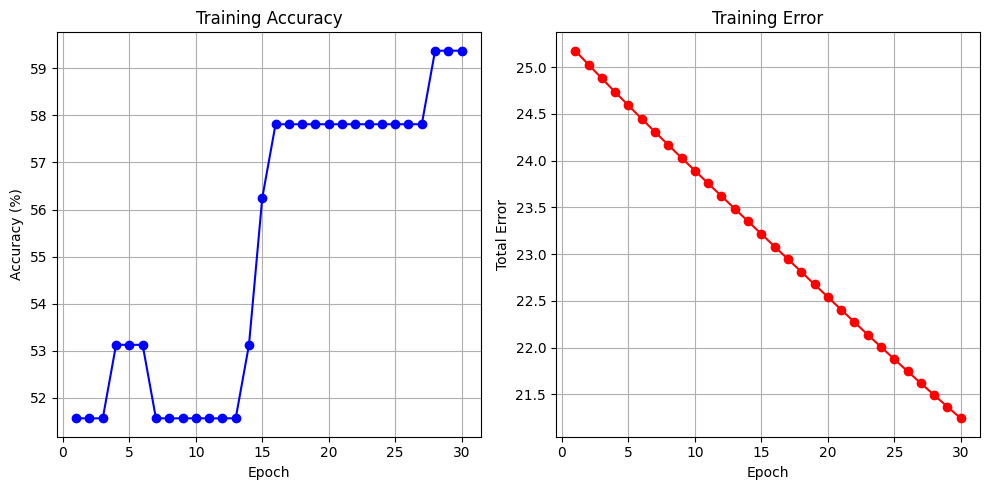

In [ ]:
import matplotlib.pyplot as plt

# PROSES TRAINING
accuracy_per_epoch = []
history_error = []

print(f"Mulai pelatihan untuk {epochs} epoch...")

for epoch in range(epochs):
    total_error = 0
    correct_predictions = 0

    for i in range(X_train.shape[0]):
        # Feedforward
        x = X_train[i]
        target = np.zeros(output_size)
        target[y_train[i]] = 1

        # Hidden layer
        z_inj = v0 + np.dot(V, x)
        z_j = sigmoid(z_inj)

        # Output layer
        y_ink = w0 + np.dot(W, z_j)
        y_k = sigmoid(y_ink)

        # Hitung Error
        error = target - y_k
        total_error += np.sum(error ** 2) / 2

        # Cek Prediksi (untuk akurasi)
        if np.argmax(y_k) == y_train[i]:
            correct_predictions += 1

        # Backpropagation
        delta_k = error * sigmoid_derivative(y_k)
        delta_j = np.dot(delta_k, W) * sigmoid_derivative(z_j)

        # Update Bobot
        W += alpha * np.outer(delta_k, z_j)
        w0 += alpha * delta_k
        V += alpha * np.outer(delta_j, x)
        v0 += alpha * delta_j

    # Simpan data per epoch
    epoch_accuracy = (correct_predictions / X_train.shape[0]) * 100
    accuracy_per_epoch.append(epoch_accuracy)
    history_error.append(total_error)

    print(f"Epoch {epoch + 1}/{epochs} | Error: {total_error:.4f} | Accuracy: {epoch_accuracy:.2f}%")

# PROSES PLOTTING
print("\nTraining selesai! Menampilkan grafik...")

plt.figure(figsize=(10, 5))

# Plot Akurasi
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), accuracy_per_epoch, marker='o', linestyle='-', color='b')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

# Plot Error
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history_error, marker='o', linestyle='-', color='r')
plt.title("Training Error")
plt.xlabel("Epoch")
plt.ylabel("Total Error")
plt.grid(True)

plt.tight_layout()
plt.show()

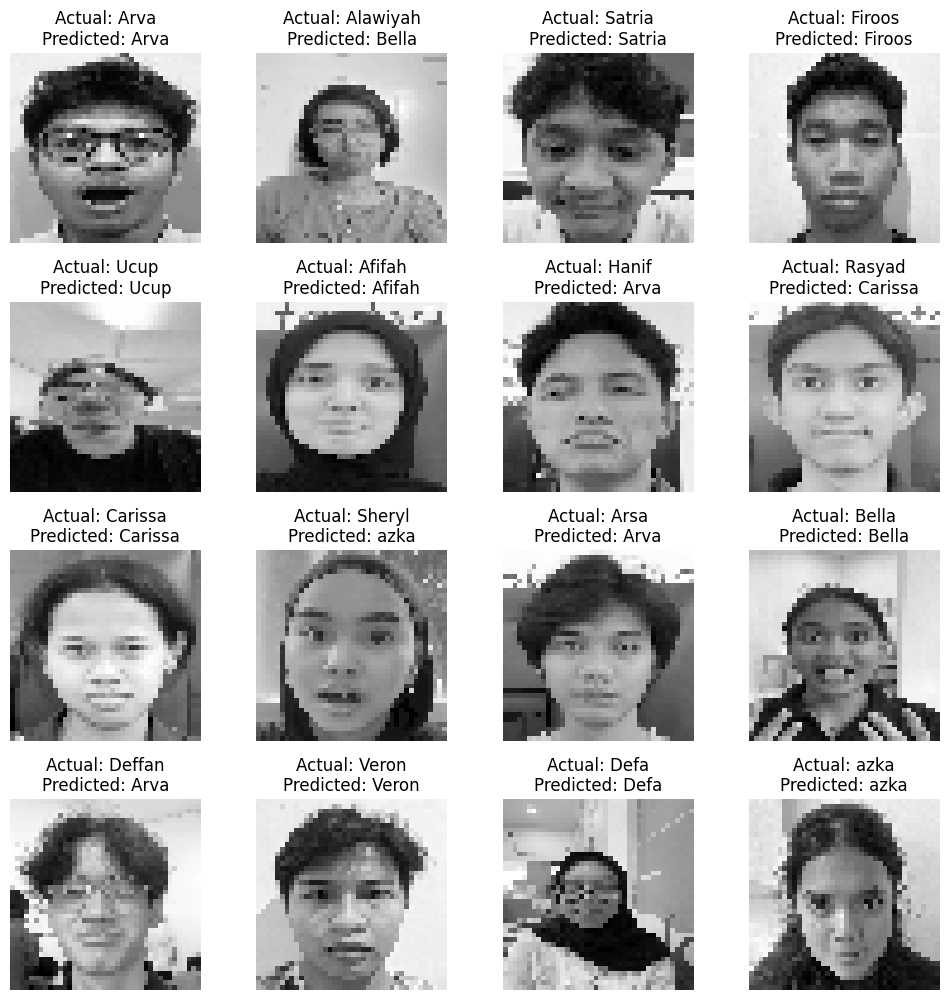

In [ ]:
import matplotlib.pyplot as plt

# Tentukan jumlah kolom
cols = 4
# Calculate rows based on the actual number of test samples
rows = (50 + cols - 1) // cols  # Hitung jumlah baris dengan membulatkan ke atas

plt.figure(figsize=(10, rows * 2.5))  # Adjust figure size dynamically based on rows

# Tampilkan prediksi
for i in range(len(X_test)):  # Iterate over the actual number of test samples
    x = X_test[i].reshape(40, 40)
    t = y_test[i]

    # Feedforward to get prediction for the current test sample
    # Hidden layer
    z_inj = v0 + np.dot(V, X_test[i])
    z_j = sigmoid(z_inj)

    # Output layer
    y_ink = w0 + np.dot(W, z_j)
    y_k = sigmoid(y_ink)

    predicted_label = np.argmax(y_k)
    actual_name = label_map[t]
    predicted_name = label_map[predicted_label]

    # Tentukan posisi subplot (4 kolom dan melanjutkan ke bawah)
    plt.subplot(rows, cols, i + 1)  # i+1 karena plt.subplot dimulai dari 1

    plt.imshow(x, cmap='gray')
    plt.title(f"Actual: {actual_name}\nPredicted: {predicted_name}")
    plt.axis('off')

# Tampilkan gambar
plt.tight_layout()  # Supaya layout lebih rapi
plt.show()

# **Matrix Based Method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import os
import cv2

# --- FUNGSI LOAD DATASET ---
def load_dataset(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah. Pastikan drive sudah dimount.")
        return np.array([]), np.array([]), {}

    # Iterasi Folder
    for subdir in sorted(os.listdir(base_path)):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(subdir_path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    file_path = os.path.join(subdir_path, file)
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40)) # Resize standar
                    data.append(img.flatten())      # Flatten dulu untuk PCA
                    labels.append(current_label)
            current_label += 1

    return np.array(data), np.array(labels), label_map

# --- LOAD DATA ---
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/" # Sesuaikan path
X_raw, y, label_map = load_dataset(dataset_path)

# Normalisasi data (0-1)
X_raw = X_raw / 255.0

print(f"Data Loaded: {X_raw.shape} (Jumlah Gambar, Jumlah Pixel Asli)")
print(f"Jumlah Kelas: {len(label_map)}")

# --- FUNGSI AKTIVASI (Sesuai Screenshot) ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

Data Loaded: (80, 1600) (Jumlah Gambar, Jumlah Pixel Asli)
Jumlah Kelas: 16


Data Loaded: (80, 1600) (Jumlah Gambar, Jumlah Pixel Asli)
Jumlah Kelas: 16
=== STATUS DATASET ===
Total File Foto Ditemukan : 80
Total Fitur per Foto      : 1600 (40x40 pixel)
Total Kelas (Orang)       : 16
Daftar Kelas              : ['Afifah', 'Alawiyah', 'Arsa', 'Arva', 'Bella', 'Carissa', 'Defa', 'Deffan', 'Firoos', 'Hanif', 'Rasyad', 'Satria', 'Sheryl', 'Ucup', 'Veron', 'azka']
----------------------------------------
Data dipecah menjadi:
-> Training Data (Buat Belajar) : 64 foto
-> Testing Data (Buat Ujian)    : 16 foto
----------------------------------------
Mengompresi pixel wajah menjadi 50 fitur utama (Eigenfaces)...
Shape Input Lama (Training) : (64, 1600)
Shape Input Baru (Training) : (64, 50) <-- Masuk ke BPNN


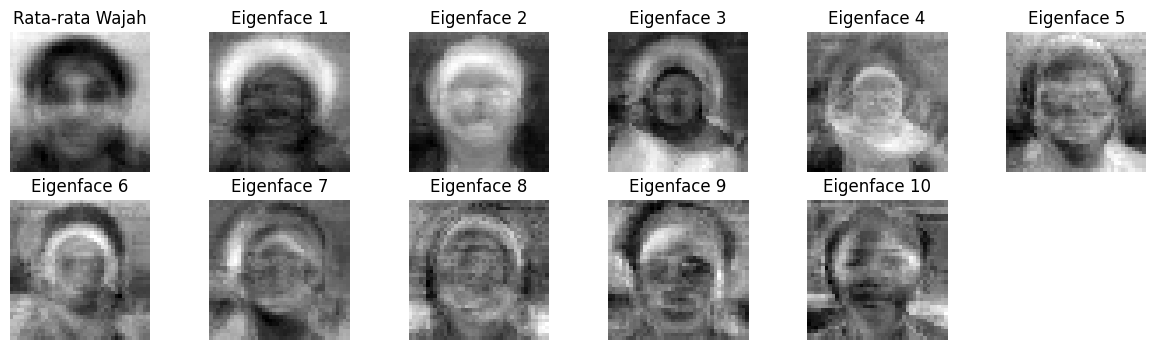

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import os
import cv2

# --- FUNGSI LOAD DATASET ---
def load_dataset(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah. Pastikan drive sudah dimount.")
        return np.array([]), np.array([]), {}

    # Iterasi Folder
    for subdir in sorted(os.listdir(base_path)):
        subdir_path = os.path.join(base_path, subdir)
        if os.path.isdir(subdir_path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(subdir_path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    file_path = os.path.join(subdir_path, file)
                    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40)) # Resize standar
                    data.append(img.flatten())      # Flatten dulu untuk PCA
                    labels.append(current_label)
            current_label += 1

    return np.array(data), np.array(labels), label_map

# --- LOAD DATA ---
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/" # Sesuaikan path
X_raw, y, label_map = load_dataset(dataset_path)

# Normalisasi data (0-1)
X_raw = X_raw / 255.0

print(f"Data Loaded: {X_raw.shape} (Jumlah Gambar, Jumlah Pixel Asli)")
print(f"Jumlah Kelas: {len(label_map)}")

# --- FUNGSI AKTIVASI (Sesuai Screenshot) ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# --- REVISI STEP 2: MATRIX DECOMPOSITION (PCA) DENGAN CEK DATA ---

# from sklearn.model_selection import train_test_split
# from sklearn.decomposition import PCA

# 1. CEK TOTAL DATA DULU (Supaya yakin 16 orang masuk)
print("=== STATUS DATASET ===")
print(f"Total File Foto Ditemukan : {X_raw.shape[0]}")
print(f"Total Fitur per Foto      : {X_raw.shape[1]} (40x40 pixel)")
print(f"Total Kelas (Orang)       : {len(label_map)}")
print(f"Daftar Kelas              : {list(label_map.values())}") # Cek nama folder
print("-" * 40)

# 2. SPLIT DATA (PENTING: Kita pisah Training & Testing)
# Training 80%, Testing 20%
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, stratify=y, random_state=42)

print(f"Data dipecah menjadi:")
print(f"-> Training Data (Buat Belajar) : {X_train_raw.shape[0]} foto")
print(f"-> Testing Data (Buat Ujian)    : {X_test_raw.shape[0]} foto")
print("-" * 40)

# 3. PROSES PCA (KOMPRESI)
n_components = 50
print(f"Mengompresi pixel wajah menjadi {n_components} fitur utama (Eigenfaces)...")

pca = PCA(n_components=n_components, whiten=True)

# Fit PCA hanya pada data Training (Supaya adil, model gak ngintip data ujian)
pca.fit(X_train_raw)

# Transformasi (Ubah 1600 pixel jadi 50 angka)
X_train_pca = pca.transform(X_train_raw)
X_test_pca = pca.transform(X_test_raw)

print(f"Shape Input Lama (Training) : {X_train_raw.shape}")
print(f"Shape Input Baru (Training) : {X_train_pca.shape} <-- Masuk ke BPNN")

# --- VISUALISASI EIGENFACES ---
plt.figure(figsize=(15, 4))
plt.subplot(2, 6, 1)
plt.imshow(pca.mean_.reshape(40, 40), cmap='gray')
plt.title("Rata-rata Wajah")
plt.axis('off')

for i in range(10):
    plt.subplot(2, 6, i+2) # Changed (1, 6, i+2) to (2, 6, i+2) to fit a 2x6 grid
    plt.imshow(pca.components_[i].reshape(40, 40), cmap='gray')
    plt.title(f"Eigenface {i+1}")
    plt.axis('off')
plt.show()

In [ ]:
# --- KONFIGURASI JARINGAN NEURAL ---

# Parameter
input_size = n_components  # PENTING: Input size sekarang 50, bukan 1600!
hidden_size = 64           # Hidden layer
output_size = len(label_map) # Jumlah orang (output)
learning_rate = 0.01       # Alpha
epochs = 50                # Jumlah perulangan

# Array untuk menyimpan history training (untuk plot nanti)
history_loss = []
history_acc = []

# --- INISIALISASI BOBOT DAN BIAS (RANDOM) ---
np.random.seed(42)

# V: Bobot dari Input (50) ke Hidden (64)
V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
v0 = np.random.uniform(-0.5, 0.5, hidden_size) # Bias hidden

# W: Bobot dari Hidden (64) ke Output (Jumlah Kelas)
W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
w0 = np.random.uniform(-0.5, 0.5, output_size) # Bias output

print("Bobot diinisialisasi.")
print(f"Ukuran Matriks V: {V.shape}")
print(f"Ukuran Matriks W: {W.shape}")

Bobot diinisialisasi.
Ukuran Matriks V: (64, 50)
Ukuran Matriks W: (16, 64)


In [ ]:
import sys # Untuk print progress bar sederhana

print(f"Mulai Melatih Model Matrix BPNN selama {epochs} epoch...")
print("-" * 60)

# --- LOOP EPOCH ---
for epoch in range(epochs):
    total_error = 0
    correct_predictions = 0

    # --- LOOP SETIAP DATA (Pattern Mode) ---
    for i in range(len(X_train_pca)):

        # 1. SIAPKAN INPUT & TARGET
        # Ambil satu data (vektor 50 fitur)
        x = X_train_pca[i]

        # Buat target one-hot encoding (misal label 3 jadi [0,0,0,1,0...])
        t = np.zeros(output_size)
        t[y_train[i]] = 1

        # 2. FEEDFORWARD (MAJU)

        # Hitung sinyal masuk Hidden Layer (Z_in)
        # Rumus: Bias + (Bobot V dot Input)
        z_inj = v0 + np.dot(V, x)

        # Aktivasi Hidden Layer (Z)
        z_j = sigmoid(z_inj)

        # Hitung sinyal masuk Output Layer (Y_in)
        # Rumus: Bias + (Bobot W dot Output Hidden)
        y_ink = w0 + np.dot(W, z_j)

        # Aktivasi Output Layer (Y) --> Hasil Prediksi
        y_k = sigmoid(y_ink)

        # 3. HITUNG ERROR & AKURASI

        # Error per neuron output
        error = t - y_k

        # Total Error (Sum Squared Error / 2)
        total_error += np.sum(error ** 2) / 2

        # Cek apakah prediksi benar (ambil index nilai tertinggi)
        if np.argmax(y_k) == np.argmax(t):
            correct_predictions += 1

        # 4. BACKPROPAGATION (MUNDUR)

        # Hitung faktor koreksi Output Layer (Delta K)
        # Rumus: Error * Turunan Sigmoid Output
        delta_k = error * sigmoid_derivative(y_k)

        # Hitung faktor koreksi Hidden Layer (Delta J)
        # Rumus: (Delta K dot Bobot W) * Turunan Sigmoid Hidden
        # Ini menyebarkan error balik dari output ke hidden
        delta_j = np.dot(delta_k, W) * sigmoid_derivative(z_j)

        # 5. UPDATE BOBOT (GRADIENT DESCENT)

        # Update Bobot Output (W) dan Bias Output (w0)
        W += learning_rate * np.outer(delta_k, z_j)
        w0 += learning_rate * delta_k

        # Update Bobot Input (V) dan Bias Input (v0)
        V += learning_rate * np.outer(delta_j, x)
        v0 += learning_rate * delta_j

    # --- PENCATATAN HASIL PER EPOCH ---
    avg_error = total_error / len(X_train_pca)
    accuracy = (correct_predictions / len(X_train_pca)) * 100

    history_loss.append(total_error)
    history_acc.append(accuracy)

    # Tampilkan log setiap 5 epoch
    if (epoch + 1) % 5 == 0 or epoch == 0:
        print(f"Epoch {epoch + 1}/{epochs} | Total Error: {total_error:.4f} | Akurasi Training: {accuracy:.2f}%")

print("-" * 60)
print("Pelatihan Selesai.")

Mulai Melatih Model Matrix BPNN selama 50 epoch...
------------------------------------------------------------
Epoch 1/50 | Total Error: 107.7399 | Akurasi Training: 6.25%
Epoch 5/50 | Total Error: 38.1152 | Akurasi Training: 4.69%
Epoch 10/50 | Total Error: 32.4220 | Akurasi Training: 6.25%
Epoch 15/50 | Total Error: 30.9916 | Akurasi Training: 7.81%
Epoch 20/50 | Total Error: 30.3002 | Akurasi Training: 9.38%
Epoch 25/50 | Total Error: 29.8337 | Akurasi Training: 12.50%
Epoch 30/50 | Total Error: 29.4487 | Akurasi Training: 15.62%
Epoch 35/50 | Total Error: 29.0910 | Akurasi Training: 17.19%
Epoch 40/50 | Total Error: 28.7355 | Akurasi Training: 21.88%
Epoch 45/50 | Total Error: 28.3691 | Akurasi Training: 26.56%
Epoch 50/50 | Total Error: 27.9843 | Akurasi Training: 28.12%
------------------------------------------------------------
Pelatihan Selesai.


Mengevaluasi data testing...

>>> AKURASI TESTING AKHIR (Matrix Method): 12.50% <<<



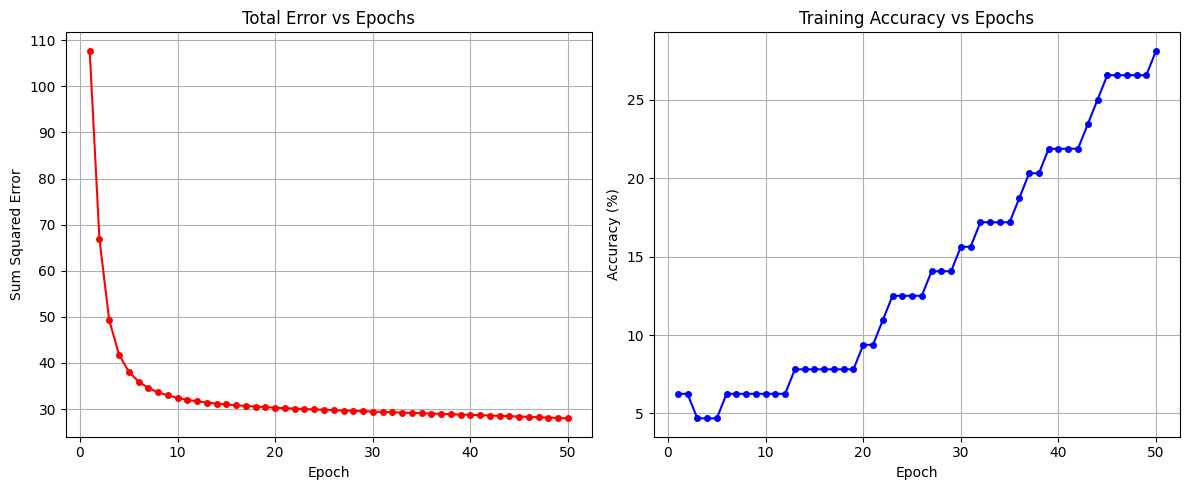

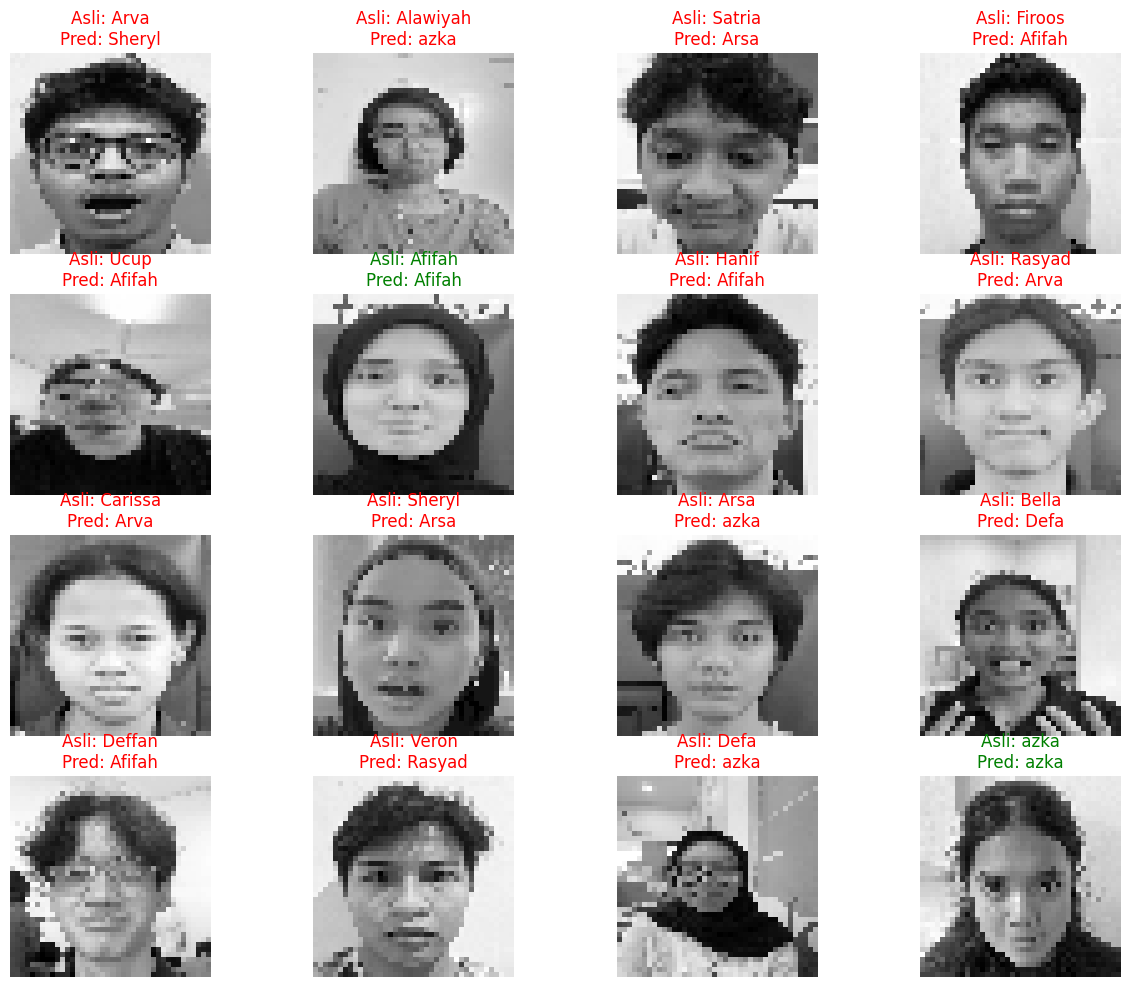

In [ ]:
# --- EVALUASI PADA DATA TESTING ---
correct_test = 0
confusion_matrix = np.zeros((output_size, output_size))

print("Mengevaluasi data testing...")

for i in range(len(X_test_pca)):
    # Feedforward Test Data
    x = X_test_pca[i]
    t_idx = y_test[i]

    # Hidden
    z_test = sigmoid(v0 + np.dot(V, x))
    # Output
    y_test_pred = sigmoid(w0 + np.dot(W, z_test))

    # Ambil kelas prediksi
    predicted_label = np.argmax(y_test_pred)

    # Hitung Akurasi
    if predicted_label == t_idx:
        correct_test += 1

    # Isi confusion matrix (opsional)
    confusion_matrix[t_idx, predicted_label] += 1

final_accuracy = (correct_test / len(X_test_pca)) * 100
print(f"\n>>> AKURASI TESTING AKHIR (Matrix Method): {final_accuracy:.2f}% <<<\n")

# --- PLOTTING GRAFIK ---
plt.figure(figsize=(12, 5))

# Plot 1: Error (Loss) per Epoch
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history_loss, marker='o', color='red', markersize=4)
plt.title("Total Error vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Sum Squared Error")
plt.grid(True)

# Plot 2: Akurasi per Epoch
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history_acc, marker='o', color='blue', markersize=4)
plt.title("Training Accuracy vs Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.grid(True)

plt.tight_layout()
plt.show()

# --- PREDIKSI VISUAL (CONTOH) ---
# Tampilkan 16 gambar test dan prediksinya
plt.figure(figsize=(15, 12)) # Adjusted figure size for more rows
for i in range(16):
    idx = i  # Ambil data ke-i

    # Ambil gambar asli (X_test_raw) untuk ditampilkan
    img_display = X_test_raw[idx].reshape(40, 40)

    # Lakukan prediksi ulang manual
    z = sigmoid(v0 + np.dot(V, X_test_pca[idx]))
    y_p = sigmoid(w0 + np.dot(W, z))
    pred_lbl = np.argmax(y_p)
    actual_lbl = y_test[idx]

    plt.subplot(4, 4, i+1) # Changed to 4 rows, 4 columns to accommodate 16 images
    plt.imshow(img_display, cmap='gray')
    color = 'green' if pred_lbl == actual_lbl else 'red'
    plt.title(f"Asli: {label_map[actual_lbl]}\nPred: {label_map[pred_lbl]}", color=color)
    plt.axis('off')
plt.show()

# **Neuron Variation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2

# --- FUNGSI LOAD DATASET ---
def load_dataset_vector(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah.")
        return None, None, None

    for subdir in sorted(os.listdir(base_path)):
        path = os.path.join(base_path, subdir)
        if os.path.isdir(path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40))
                    data.append(img.flatten()) # 1600 Input
                    labels.append(current_label)
            current_label += 1
    return np.array(data), np.array(labels), label_map

# Load & Split
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/"
X_vec, y, label_map = load_dataset_vector(dataset_path)
X_vec = X_vec / 255.0

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, stratify=y, random_state=42)

print(f"Data Siap. Input Size: 1600 pixel.")

Data Siap. Input Size: 1600 pixel.


In [ ]:
# --- FUNGSI TRAINING FLEKSIBEL (Variasi Neuron) ---
def latih_variasi_neuron(jumlah_neuron, epochs=40):
    print(f"\n>>> SEDANG MELATIH MODEL DENGAN {jumlah_neuron} NEURON HIDDEN <<<")

    # 1. Setup Ukuran Matriks
    input_size = 1600
    hidden_size = jumlah_neuron  # <--- INI YANG BERUBAH
    output_size = len(label_map)
    learning_rate = 0.1 # Kita set alpha optimal biar adil

    # 2. Inisialisasi Bobot
    # Matriks V ukurannya (hidden_size x 1600)
    # Matriks W ukurannya (output_size x hidden_size)
    np.random.seed(42)
    V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    v0 = np.random.uniform(-0.5, 0.5, hidden_size)
    W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    w0 = np.random.uniform(-0.5, 0.5, output_size)

    # Info Ukuran Matriks (Untuk Cek Logika)
    print(f"   -> Ukuran Bobot V: {V.shape} (Total {V.size} parameter)")
    print(f"   -> Ukuran Bobot W: {W.shape} (Total {W.size} parameter)")

    # Fungsi Aktivasi
    def sigmoid(x): return 1 / (1 + np.exp(-x))
    def sigmoid_deriv(x): return x * (1 - x)

    history_acc = []

    # 3. Training Loop
    for epoch in range(epochs):
        correct = 0
        for i in range(len(X_train)):
            # Forward
            x_in = X_train[i]
            t = np.zeros(output_size); t[y_train[i]] = 1

            z = sigmoid(v0 + np.dot(V, x_in))
            y_pred = sigmoid(w0 + np.dot(W, z))

            if np.argmax(y_pred) == y_train[i]: correct += 1

            # Backward
            error = t - y_pred
            delta_k = error * sigmoid_deriv(y_pred)
            delta_j = np.dot(delta_k, W) * sigmoid_deriv(z)

            # Update
            W += learning_rate * np.outer(delta_k, z)
            w0 += learning_rate * delta_k
            V += learning_rate * np.outer(delta_j, x_in)
            v0 += learning_rate * delta_j

        acc = (correct / len(X_train)) * 100
        history_acc.append(acc)

        # Log tiap 10 epoch biar gak penuh
        if (epoch+1) % 10 == 0:
            print(f"   Epoch {epoch+1}: Akurasi {acc:.2f}%")

    return history_acc, V, W, v0, w0

print("Fungsi Siap.")

Fungsi Siap.



>>> SEDANG MELATIH MODEL DENGAN 10 NEURON HIDDEN <<<
   -> Ukuran Bobot V: (10, 1600) (Total 16000 parameter)
   -> Ukuran Bobot W: (16, 10) (Total 160 parameter)
   Epoch 10: Akurasi 10.94%
   Epoch 20: Akurasi 14.06%
   Epoch 30: Akurasi 12.50%
   Epoch 40: Akurasi 21.88%
   Epoch 50: Akurasi 31.25%

>>> SEDANG MELATIH MODEL DENGAN 64 NEURON HIDDEN <<<
   -> Ukuran Bobot V: (64, 1600) (Total 102400 parameter)
   -> Ukuran Bobot W: (16, 64) (Total 1024 parameter)
   Epoch 10: Akurasi 64.06%
   Epoch 20: Akurasi 79.69%
   Epoch 30: Akurasi 95.31%
   Epoch 40: Akurasi 100.00%
   Epoch 50: Akurasi 100.00%

>>> SEDANG MELATIH MODEL DENGAN 200 NEURON HIDDEN <<<
   -> Ukuran Bobot V: (200, 1600) (Total 320000 parameter)
   -> Ukuran Bobot W: (16, 200) (Total 3200 parameter)
   Epoch 10: Akurasi 82.81%
   Epoch 20: Akurasi 100.00%
   Epoch 30: Akurasi 100.00%
   Epoch 40: Akurasi 100.00%
   Epoch 50: Akurasi 100.00%


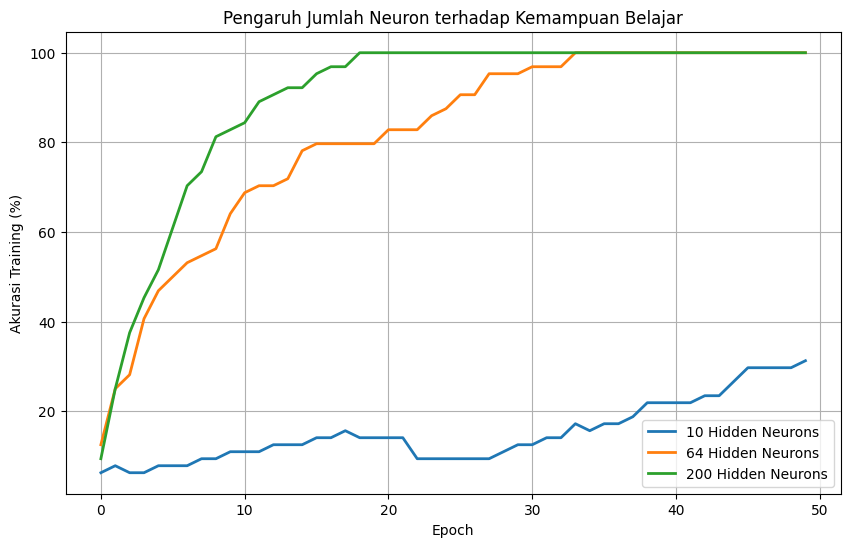


=== ANALISIS HASIL ===
1. Garis (10 Neuron): Kemungkinan paling bawah. Model 'bodoh' karena kapasitas otaknya kecil.
2. Garis (64 Neuron): Seimbang. Belajar cepat dan akurasi tinggi.
3. Garis (200 Neuron): Bisa jadi paling tinggi, ATAU malah lambat naik di awal karena terlalu banyak bobot yang harus diatur (Kompleksitas Tinggi).


In [ ]:
# --- JALANKAN EKSPERIMEN ---# Re-split X_vec and y to ensure X_train and y_train are correctly formatted for this section
# This is necessary because X_train might have been overwritten by CNN data (40x40x1) from previous cells.
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, stratify=y, random_state=42)

neuron_variations = [10, 64, 200]
results = {}

plt.figure(figsize=(10, 6))

for n in neuron_variations:
    # Latih
    hist, _, _, _, _ = latih_variasi_neuron(n, epochs=50)
    results[n] = hist

    # Plot ke Grafik
    plt.plot(hist, label=f'{n} Hidden Neurons', linewidth=2)

# --- FINISHING GRAFIK ---
plt.title("Pengaruh Jumlah Neuron terhadap Kemampuan Belajar")
plt.xlabel("Epoch")
plt.ylabel("Akurasi Training (%)")
plt.legend()
plt.grid(True)
plt.show()

# --- ANALISIS ---
print("\n=== ANALISIS HASIL ===")
print("1. Garis (10 Neuron): Kemungkinan paling bawah. Model 'bodoh' karena kapasitas otaknya kecil.")
print("2. Garis (64 Neuron): Seimbang. Belajar cepat dan akurasi tinggi.")
print("3. Garis (200 Neuron): Bisa jadi paling tinggi, ATAU malah lambat naik di awal karena terlalu banyak bobot yang harus diatur (Kompleksitas Tinggi).")

In [ ]:
print("=== DEMO MANUAL: PERBEDAAN UKURAN MATRIKS ===")

input_len = 1600 # Gambar 40x40

# --- KASUS 1: NEURON SEDIKIT (10) ---
hidden_small = 10
weights_small = hidden_small * input_len
print(f"[KASUS A] 10 Neuron")
print(f"Rumus: Z = V dot X")
print(f"Matriks V berukuran ({hidden_small} baris, {input_len} kolom)")
print(f"Total Parameter yang harus dipelajari: {weights_small} bobot.")
print("-> KESIMPULAN: Ringan, cepat dihitung, tapi TIDAK BISA menyimpan banyak pola wajah.")
print("-" * 40)

# --- KASUS 2: NEURON BANYAK (200) ---
hidden_big = 200
weights_big = hidden_big * input_len
print(f"[KASUS B] 200 Neuron")
print(f"Rumus: Z = V dot X")
print(f"Matriks V berukuran ({hidden_big} baris, {input_len} kolom)")
print(f"Total Parameter yang harus dipelajari: {weights_big} bobot!")
print("-> KESIMPULAN: Berat, hitungan matriks lebih lama, tapi BISA menyimpan detail wajah sangat rinci.")

=== DEMO MANUAL: PERBEDAAN UKURAN MATRIKS ===
[KASUS A] 10 Neuron
Rumus: Z = V dot X
Matriks V berukuran (10 baris, 1600 kolom)
Total Parameter yang harus dipelajari: 16000 bobot.
-> KESIMPULAN: Ringan, cepat dihitung, tapi TIDAK BISA menyimpan banyak pola wajah.
----------------------------------------
[KASUS B] 200 Neuron
Rumus: Z = V dot X
Matriks V berukuran (200 baris, 1600 kolom)
Total Parameter yang harus dipelajari: 320000 bobot!
-> KESIMPULAN: Berat, hitungan matriks lebih lama, tapi BISA menyimpan detail wajah sangat rinci.



>>> SEDANG MELATIH MODEL DENGAN 200 NEURON HIDDEN <<<
   -> Ukuran Bobot V: (200, 1600) (Total 320000 parameter)
   -> Ukuran Bobot W: (16, 200) (Total 3200 parameter)
   Epoch 10: Akurasi 82.81%
   Epoch 20: Akurasi 100.00%
   Epoch 30: Akurasi 100.00%
   Epoch 40: Akurasi 100.00%

Visualisasi Prediksi Model Besar (200 Neuron)...


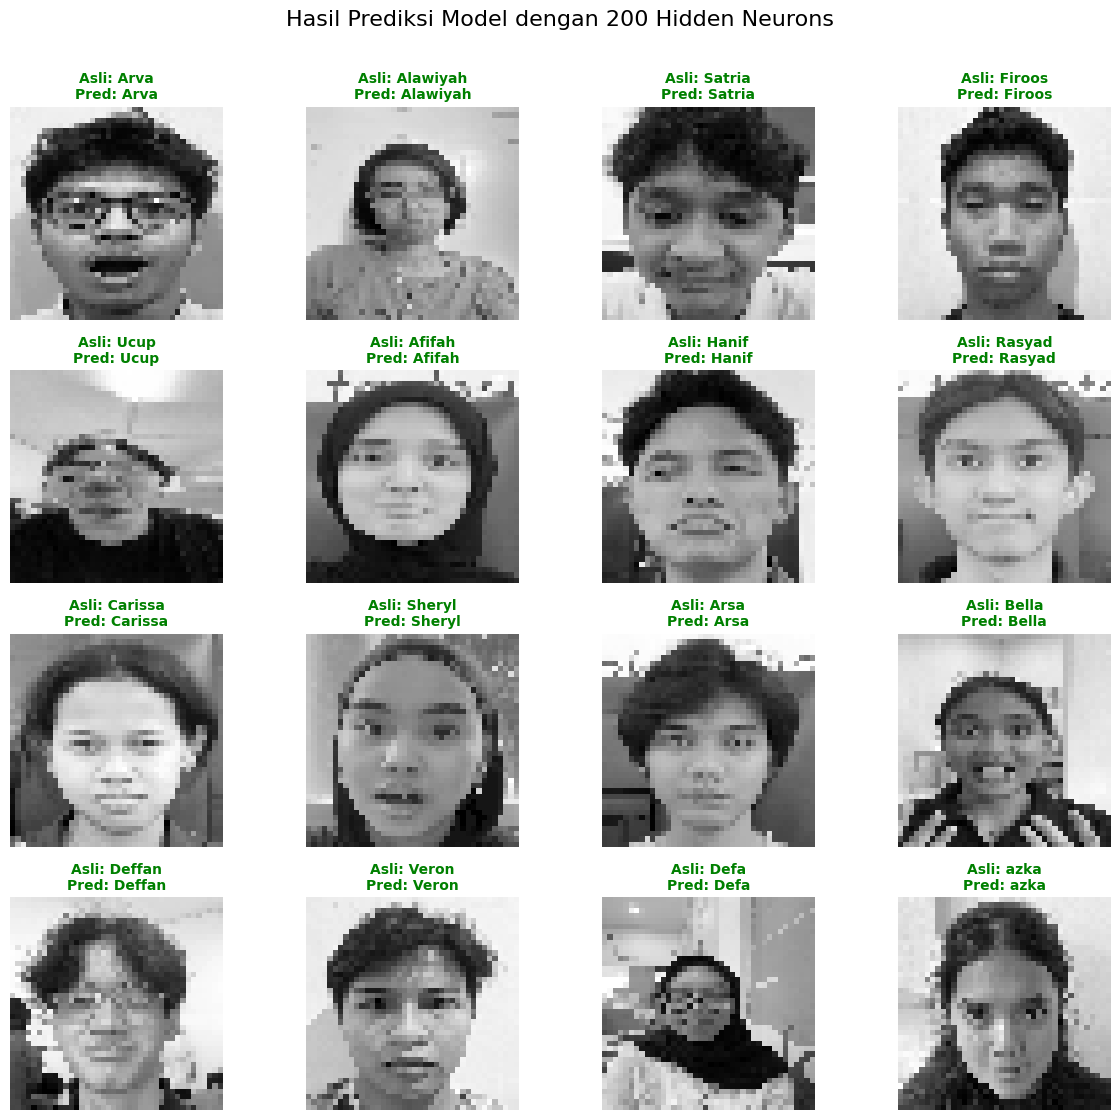

In [ ]:
# Latih ulang sebentar model 200 neuron untuk diambil bobotnya
hist_big, V_big, W_big, v0_big, w0_big = latih_variasi_neuron(200, epochs=40)

print("\nVisualisasi Prediksi Model Besar (200 Neuron)...")

def sigmoid(x): return 1 / (1 + np.exp(-x))

plt.figure(figsize=(12, 12))
plt.suptitle(f"Hasil Prediksi Model dengan 200 Hidden Neurons", fontsize=16, y=0.96)

for i in range(16):
    # Forward Pass dengan Bobot Model Besar
    z = sigmoid(v0_big + np.dot(V_big, X_test[i]))
    y_final = sigmoid(w0_big + np.dot(W_big, z))

    pred_idx = np.argmax(y_final)
    true_idx = y_test[i]

    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i].reshape(40,40), cmap='gray')

    color = 'green' if pred_idx == true_idx else 'red'
    plt.title(f"Asli: {label_map[true_idx]}\nPred: {label_map[pred_idx]}",
              color=color, fontsize=10, fontweight='bold')
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Noise Variation**


**Import Library & Datasheet**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
import time

# --- FUNGSI LOAD DATASET ---
def load_dataset_vector(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah! Cek mount drive.")
        return None, None, None

    # Loop folder
    for subdir in sorted(os.listdir(base_path)):
        path = os.path.join(base_path, subdir)
        if os.path.isdir(path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40))
                    data.append(img.flatten()) # Langsung Flatten (Vector)
                    labels.append(current_label)
            current_label += 1
    return np.array(data), np.array(labels), label_map

# --- LOAD & SPLIT ---
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/" # Sesuaikan path
X_vec, y, label_map = load_dataset_vector(dataset_path)
X_vec = X_vec / 255.0 # Normalisasi 0-1

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, stratify=y, random_state=42)

print(f"Dataset Siap.")
print(f"Data Latih : {len(X_train)} gambar")
print(f"Data Uji   : {len(X_test)} gambar (Akan kita beri noise nanti)")

Dataset Siap.
Data Latih : 64 gambar
Data Uji   : 16 gambar (Akan kita beri noise nanti)


**Training Baseline**

In [ ]:
# --- PARAMETER NEURAL NETWORK ---
input_size = 1600   # 40x40 pixel
hidden_size = 64    # Hidden layer
output_size = len(label_map)
learning_rate = 0.01
epochs = 50         # Jumlah putaran belajar

# --- INISIALISASI BOBOT (RANDOM) ---
np.random.seed(42)
V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))  # Bobot Input->Hidden
v0 = np.random.uniform(-0.5, 0.5, hidden_size)              # Bias Hidden
W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size)) # Bobot Hidden->Output
w0 = np.random.uniform(-0.5, 0.5, output_size)              # Bias Output

# Fungsi Aktivasi
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

print(">>> MULAI TRAINING MODEL BASELINE (VECTOR)...")
print("Lihat bagaimana Error turun dan Akurasi naik per Epoch:")
print("-" * 60)

# --- TRAINING LOOP ---
for epoch in range(epochs):
    total_error = 0
    correct = 0

    # Loop per gambar
    for i in range(len(X_train)):
        # 1. Forward Pass
        x_in = X_train[i]
        t = np.zeros(output_size); t[y_train[i]] = 1 # Target One-hot

        z_inj = v0 + np.dot(V, x_in)
        z = sigmoid(z_inj)

        y_ink = w0 + np.dot(W, z)
        y_pred = sigmoid(y_ink)

        # 2. Hitung Error
        error = t - y_pred
        total_error += np.sum(error ** 2) / 2

        if np.argmax(y_pred) == y_train[i]: correct += 1

        # 3. Backward Pass (Update Bobot)
        delta_k = error * sigmoid_deriv(y_pred)
        delta_j = np.dot(delta_k, W) * sigmoid_deriv(z)

        W += learning_rate * np.outer(delta_k, z)
        w0 += learning_rate * delta_k
        V += learning_rate * np.outer(delta_j, x_in)
        v0 += learning_rate * delta_j

    # Hitung rata-rata per epoch
    acc = (correct / len(X_train)) * 100

    # TAMPILKAN LOG PER EPOCH
    print(f"Epoch {epoch+1:02d}/{epochs} | Total Error: {total_error:.4f} | Akurasi Training: {acc:.2f}%")

print("-" * 60)
print("Selesai! Model Vector sudah terlatih.")

>>> MULAI TRAINING MODEL BASELINE (VECTOR)...
Lihat bagaimana Error turun dan Akurasi naik per Epoch:
------------------------------------------------------------
Epoch 01/50 | Total Error: 126.1480 | Akurasi Training: 9.38%
Epoch 02/50 | Total Error: 47.1841 | Akurasi Training: 14.06%
Epoch 03/50 | Total Error: 34.4702 | Akurasi Training: 9.38%
Epoch 04/50 | Total Error: 31.5294 | Akurasi Training: 15.62%
Epoch 05/50 | Total Error: 30.3023 | Akurasi Training: 20.31%
Epoch 06/50 | Total Error: 29.6279 | Akurasi Training: 21.88%
Epoch 07/50 | Total Error: 29.1895 | Akurasi Training: 23.44%
Epoch 08/50 | Total Error: 28.8694 | Akurasi Training: 25.00%
Epoch 09/50 | Total Error: 28.6150 | Akurasi Training: 28.12%
Epoch 10/50 | Total Error: 28.3999 | Akurasi Training: 28.12%
Epoch 11/50 | Total Error: 28.2097 | Akurasi Training: 29.69%
Epoch 12/50 | Total Error: 28.0360 | Akurasi Training: 29.69%
Epoch 13/50 | Total Error: 27.8733 | Akurasi Training: 29.69%
Epoch 14/50 | Total Error: 27.71

**Noise Calculation**

In [ ]:
# --- FUNGSI PENAMBAH NOISE ---
def add_noise(image_vector, noise_factor=0.2):
    # Buat noise random (distribusi normal)
    noise = np.random.normal(loc=0.0, scale=1.0, size=image_vector.shape)

    # Rumus: Gambar + (Faktor * Noise)
    noisy_img = image_vector + (noise_factor * noise)

    # Clip (jaga nilai tetap 0-1)
    return np.clip(noisy_img, 0., 1.)

print("=== STEP-BY-STEP PERHITUNGAN NOISE ===")
# Contoh ambil 1 pixel
pixel_asli = X_test[0][100]
faktor_noise = 0.2
nilai_random = np.random.normal(0, 1)

# Rumus Matematika
pixel_baru = pixel_asli + (faktor_noise * nilai_random)
pixel_final = min(max(pixel_baru, 0), 1)

print(f"1. Pixel Asli        : {pixel_asli:.4f}")
print(f"2. Faktor Gangguan   : {faktor_noise}")
print(f"3. Nilai Random      : {nilai_random:.4f}")
print(f"4. Rumus Perhitungan : {pixel_asli:.4f} + ({faktor_noise} * {nilai_random:.4f})")
print(f"5. Hasil Pixel Baru  : {pixel_final:.4f}")

=== STEP-BY-STEP PERHITUNGAN NOISE ===
1. Pixel Asli        : 0.1922
2. Faktor Gangguan   : 0.2
3. Nilai Random      : -0.7947
4. Rumus Perhitungan : 0.1922 + (0.2 * -0.7947)
5. Hasil Pixel Baru  : 0.0332


**Testing & Visualization**

=== 1. SEDANG MENGHITUNG AKURASI BERTINGKAT... ===
   > Noise 0.00 : Akurasi 62.50%
   > Noise 0.05 : Akurasi 62.50%
   > Noise 0.10 : Akurasi 43.75%
   > Noise 0.15 : Akurasi 43.75%
   > Noise 0.20 : Akurasi 31.25%
   > Noise 0.25 : Akurasi 37.50%
   > Noise 0.30 : Akurasi 25.00%
   > Noise 0.40 : Akurasi 25.00%
   > Noise 0.50 : Akurasi 18.75%

=== 2. MENAMPILKAN CONTOH HASIL PREDIKSI (Noise 0.2) ===


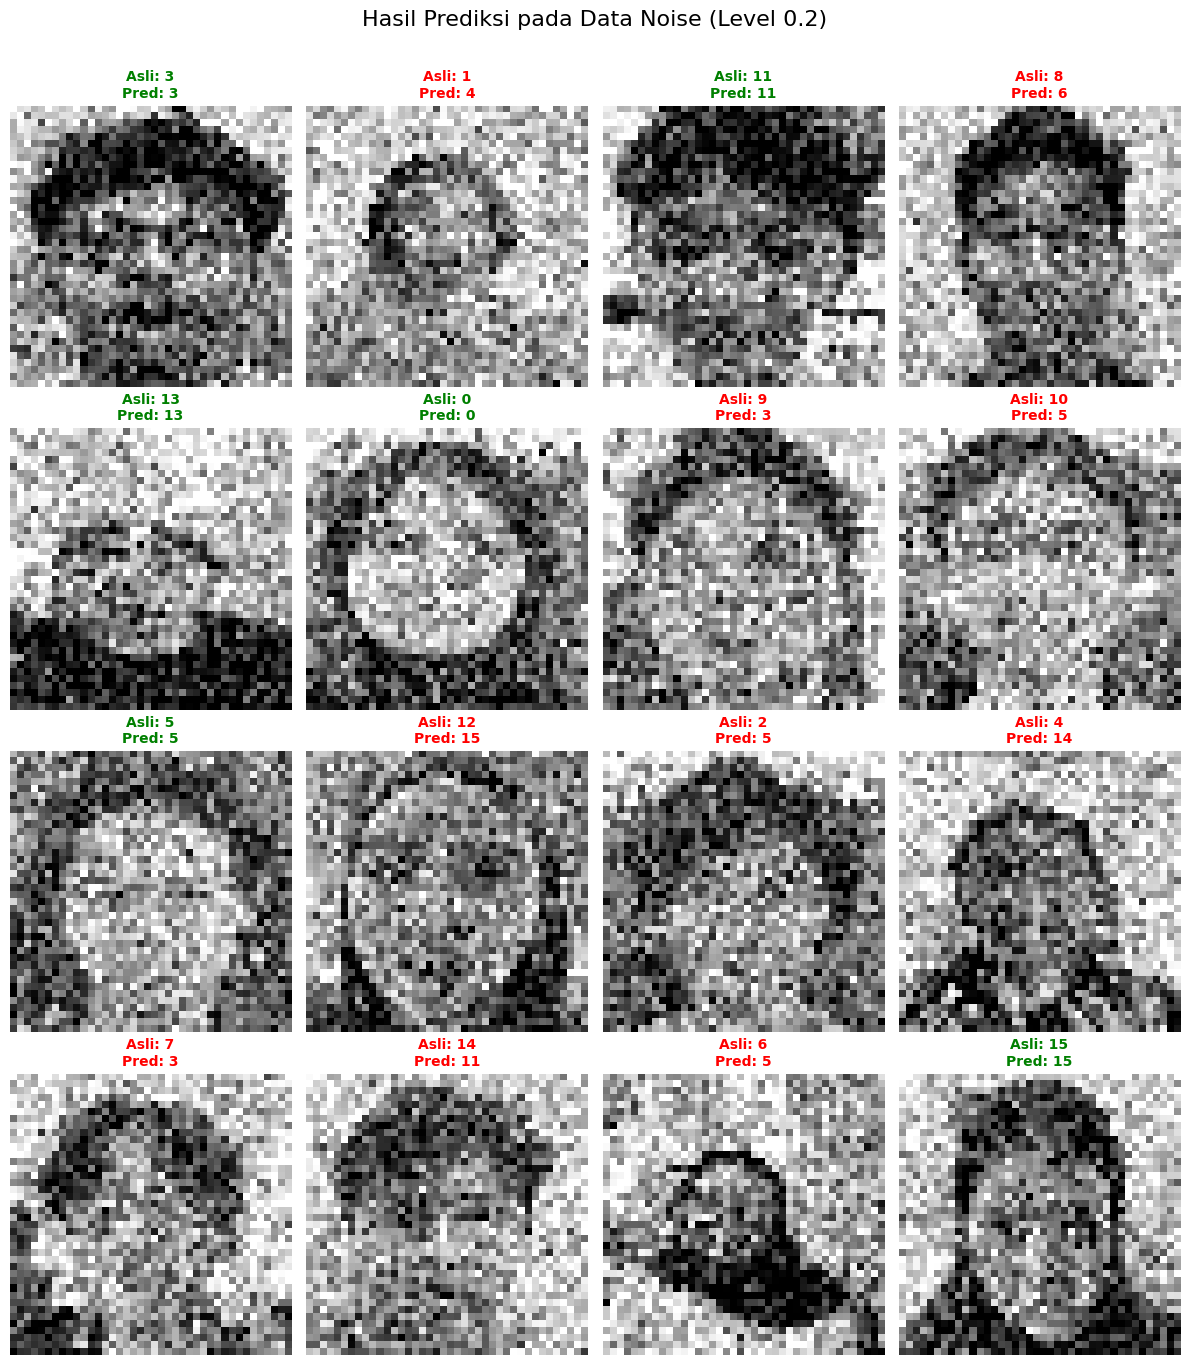


=== 3. MENAMPILKAN GRAFIK ANALISIS ===


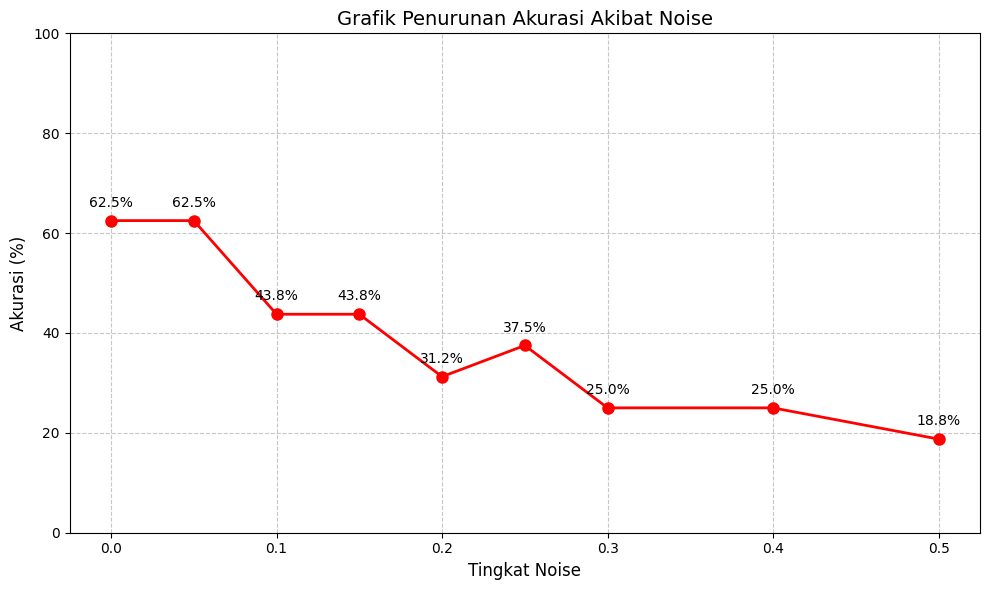

In [ ]:
# ==========================================
# BAB 5: ANALISIS VARIASI NOISE (LENGKAP)
# ==========================================
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Definisi Fungsi Noise ---
def add_noise(image_vector, noise_factor=0.2):
    noise = np.random.normal(loc=0.0, scale=1.0, size=image_vector.shape)
    noisy_img = image_vector + (noise_factor * noise)
    return np.clip(noisy_img, 0., 1.)

# --- 2. Analisis Grafik (Looping Level Noise) ---
noise_levels = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.4, 0.5]
accuracies = []

print("=== 1. SEDANG MENGHITUNG AKURASI BERTINGKAT... ===")
for nl in noise_levels:
    X_test_noisy_temp = np.array([add_noise(img, noise_factor=nl) for img in X_test])
    correct_count = 0
    total_samples = len(X_test)

    for i in range(total_samples):
        # Forward Pass
        z = sigmoid(v0 + np.dot(V, X_test_noisy_temp[i]))
        y_pred_vector = sigmoid(w0 + np.dot(W, z))
        if np.argmax(y_pred_vector) == y_test[i]:
            correct_count += 1

    acc = (correct_count / total_samples) * 100
    accuracies.append(acc)
    print(f"   > Noise {nl:.2f} : Akurasi {acc:.2f}%")

# --- 3. Visualisasi Wajah (Hasil Face Recognition) ---
print("\n=== 2. MENAMPILKAN CONTOH HASIL PREDIKSI (Noise 0.2) ===")
display_noise = 0.2
X_test_visual = np.array([add_noise(img, noise_factor=display_noise) for img in X_test])

# Siapkan plot grid 4x4
fig1, axes = plt.subplots(4, 4, figsize=(12, 14))
fig1.suptitle(f'Hasil Prediksi pada Data Noise (Level {display_noise})', fontsize=16)
axes = axes.flatten()

for i in range(min(16, len(X_test_visual))):
    # Prediksi ulang untuk visualisasi
    z = sigmoid(v0 + np.dot(V, X_test_visual[i]))
    y_pred_vector = sigmoid(w0 + np.dot(W, z))
    pred_label = np.argmax(y_pred_vector)
    true_label = y_test[i]

    # Tampilkan Gambar
    img_reshaped = X_test_visual[i].reshape(40, 40)
    axes[i].imshow(img_reshaped, cmap='gray')

    # Buat Judul (Warna Hijau jika Benar, Merah jika Salah)
    status_color = 'green' if pred_label == true_label else 'red'
    title_text = f"Asli: {true_label}\nPred: {pred_label}"
    axes[i].set_title(title_text, color=status_color, fontsize=10, fontweight='bold')
    axes[i].axis('off')

plt.tight_layout()
plt.subplots_adjust(top=0.92) # Beri ruang untuk judul atas
plt.show()

# --- 4. Tampilkan Grafik Analisis ---
print("\n=== 3. MENAMPILKAN GRAFIK ANALISIS ===")
plt.figure(figsize=(10, 6))
plt.plot(noise_levels, accuracies, marker='o', linestyle='-', color='red', linewidth=2, markersize=8)
plt.title('Grafik Penurunan Akurasi Akibat Noise', fontsize=14)
plt.xlabel('Tingkat Noise', fontsize=12)
plt.ylabel('Akurasi (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)

for i, txt in enumerate(accuracies):
    plt.annotate(f"{txt:.1f}%", (noise_levels[i], accuracies[i]),
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.show()

# **Learning Rate Variation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2

# --- FUNGSI LOAD DATASET ---
def load_dataset_vector(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah/belum dimount.")
        return None, None, None

    for subdir in sorted(os.listdir(base_path)):
        path = os.path.join(base_path, subdir)
        if os.path.isdir(path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40))
                    data.append(img.flatten()) # Vector Input
                    labels.append(current_label)
            current_label += 1
    return np.array(data), np.array(labels), label_map

# Load & Split
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/"
X_vec, y, label_map = load_dataset_vector(dataset_path)
X_vec = X_vec / 255.0

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, stratify=y, random_state=42)

print(f"Data Siap. Training: {len(X_train)}, Testing: {len(X_test)}")

Data Siap. Training: 64, Testing: 16


In [ ]:
# --- FUNGSI UTAMA BPNN (Bisa ganti Alpha) ---
def latih_model(alpha, epochs=40):
    # Parameter Tetap
    input_size = 1600
    hidden_size = 64
    output_size = len(label_map)

    # PENTING: Seed harus sama setiap kali fungsi dipanggil
    # Supaya start-nya adil, dari bobot awal yang sama persis
    np.random.seed(42)

    V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    v0 = np.random.uniform(-0.5, 0.5, hidden_size)
    W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    w0 = np.random.uniform(-0.5, 0.5, output_size)

    # Fungsi Aktivasi
    def sigmoid(x): return 1 / (1 + np.exp(-x))
    def sigmoid_deriv(x): return x * (1 - x)

    # Simpan history error per epoch
    loss_history = []

    print(f"-> Melatih dengan Learning Rate (Alpha): {alpha} ...")

    for epoch in range(epochs):
        total_error = 0
        for i in range(len(X_train)):
            # Forward
            x_in = X_train[i]
            t = np.zeros(output_size); t[y_train[i]] = 1

            z = sigmoid(v0 + np.dot(V, x_in))
            y_pred = sigmoid(w0 + np.dot(W, z))

            # Error
            error = t - y_pred
            total_error += np.sum(error ** 2) / 2

            # Update (Menggunakan ALPHA yang diinput)
            delta_k = error * sigmoid_deriv(y_pred)
            delta_j = np.dot(delta_k, W) * sigmoid_deriv(z)

            W += alpha * np.outer(delta_k, z)
            w0 += alpha * delta_k
            V += alpha * np.outer(delta_j, x_in)
            v0 += alpha * delta_j

        loss_history.append(total_error)

    return loss_history, V, W, v0, w0  # Return history dan bobot akhir

print("Fungsi Training Siap.")

Fungsi Training Siap.


In [ ]:
import numpy as np

print("=== SIMULASI PERHITUNGAN MANUAL: PENGARUH LEARNING RATE ===")

# --- SKENARIO ---
# Anggap kita punya 1 neuron dengan bobot awal tertentu
bobot_lama = 0.5000

# Komputer menghitung Error (Gradient) dari data saat ini
# Misal: Prediksi salah, sehingga ada error gradient sebesar 0.8
gradient_error = 0.8000
input_data = 1.0 # Anggap inputnya 1 biar gampang

print(f"1. Bobot Awal      : {bobot_lama}")
print(f"2. Gradient Error  : {gradient_error} (Arah koreksi)")
print("-" * 50)

# --- KASUS A: ALPHA KECIL (0.01) ---
alpha_kecil = 0.01
# Rumus: W_baru = W_lama + (Alpha * Gradient * Input)
delta_w_kecil = alpha_kecil * gradient_error * input_data
bobot_baru_kecil = bobot_lama + delta_w_kecil

print(f"[KASUS A] Learning Rate Kecil ({alpha_kecil})")
print(f"   -> Perhitungan : {bobot_lama} + ({alpha_kecil} * {gradient_error})")
print(f"   -> Perubahan   : +{delta_w_kecil:.6f}")
print(f"   -> Bobot Akhir : {bobot_baru_kecil:.6f}")
print(f"   -> Kesimpulan  : Bobot berubah SEDIKIT (Belajar pelan-pelan, hati-hati).")

print("-" * 50)

# --- KASUS B: ALPHA BESAR (0.9) ---
alpha_besar = 0.9
# Rumus sama, cuma Alpha beda
delta_w_besar = alpha_besar * gradient_error * input_data
bobot_baru_besar = bobot_lama + delta_w_besar

print(f"[KASUS B] Learning Rate Besar ({alpha_besar})")
print(f"   -> Perhitungan : {bobot_lama} + ({alpha_besar} * {gradient_error})")
print(f"   -> Perubahan   : +{delta_w_besar:.6f}")
print(f"   -> Bobot Akhir : {bobot_baru_besar:.6f}")
print(f"   -> Kesimpulan  : Bobot berubah DRASTIS (Belajar ngebut, tapi berisiko kelewatan).")

=== SIMULASI PERHITUNGAN MANUAL: PENGARUH LEARNING RATE ===
1. Bobot Awal      : 0.5
2. Gradient Error  : 0.8 (Arah koreksi)
--------------------------------------------------
[KASUS A] Learning Rate Kecil (0.01)
   -> Perhitungan : 0.5 + (0.01 * 0.8)
   -> Perubahan   : +0.008000
   -> Bobot Akhir : 0.508000
   -> Kesimpulan  : Bobot berubah SEDIKIT (Belajar pelan-pelan, hati-hati).
--------------------------------------------------
[KASUS B] Learning Rate Besar (0.9)
   -> Perhitungan : 0.5 + (0.9 * 0.8)
   -> Perubahan   : +0.720000
   -> Bobot Akhir : 1.220000
   -> Kesimpulan  : Bobot berubah DRASTIS (Belajar ngebut, tapi berisiko kelewatan).



>>> MELATIH MODEL LAMBAT (Alpha: 0.001) <<<
Epoch 01 | Error: 192.4615 | Akurasi: 7.81%
Epoch 02 | Error: 175.6927 | Akurasi: 7.81%
Epoch 03 | Error: 158.9874 | Akurasi: 7.81%
Epoch 04 | Error: 142.2631 | Akurasi: 10.94%
Epoch 05 | Error: 126.1454 | Akurasi: 10.94%
Epoch 06 | Error: 111.4858 | Akurasi: 9.38%
Epoch 07 | Error: 98.6895 | Akurasi: 7.81%
Epoch 08 | Error: 87.6389 | Akurasi: 7.81%
Epoch 09 | Error: 78.0338 | Akurasi: 7.81%
Epoch 10 | Error: 69.7056 | Akurasi: 7.81%
Epoch 11 | Error: 62.6445 | Akurasi: 9.38%
Epoch 12 | Error: 56.8438 | Akurasi: 9.38%
Epoch 13 | Error: 52.1998 | Akurasi: 9.38%
Epoch 14 | Error: 48.5285 | Akurasi: 9.38%
Epoch 15 | Error: 45.6273 | Akurasi: 12.50%
Epoch 16 | Error: 43.3170 | Akurasi: 12.50%
Epoch 17 | Error: 41.4557 | Akurasi: 12.50%
Epoch 18 | Error: 39.9364 | Akurasi: 14.06%
Epoch 19 | Error: 38.6802 | Akurasi: 14.06%
Epoch 20 | Error: 37.6288 | Akurasi: 10.94%

>>> MELATIH MODEL OPTIMAL (Alpha: 0.1) <<<
Epoch 01 | Error: 45.9788 | Akurasi: 

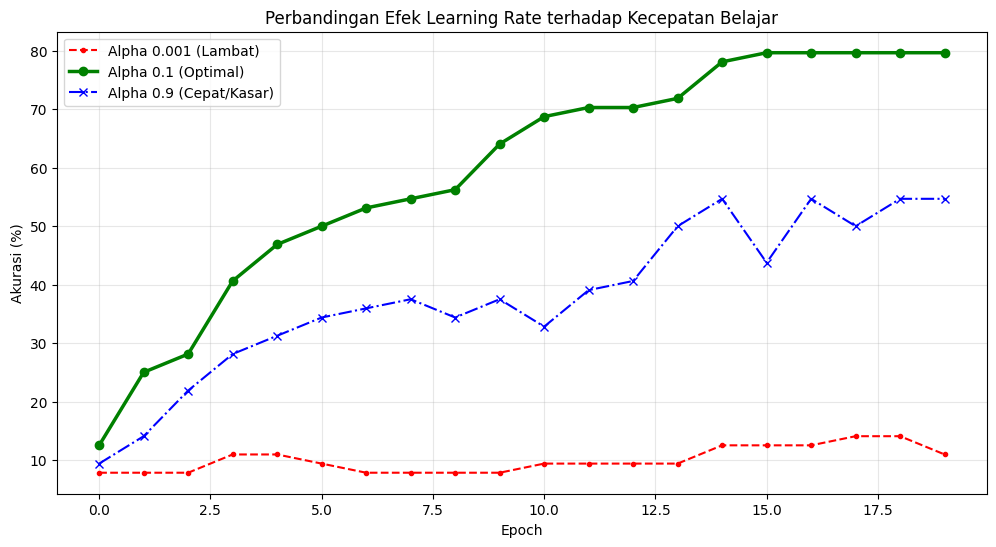

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Pastikan X_train, y_train, dll sudah ter-load dari blok sebelumnya

# --- FUNGSI TRAINING DENGAN LOG DETIL ---
def latih_dengan_log(alpha, nama_model):
    print(f"\n>>> MELATIH {nama_model} (Alpha: {alpha}) <<<")

    # Inisialisasi Ulang (Reset Otak) supaya start-nya adil
    np.random.seed(42)
    input_size = 1600; hidden_size = 64; output_size = len(label_map)

    V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    v0 = np.random.uniform(-0.5, 0.5, hidden_size)
    W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    w0 = np.random.uniform(-0.5, 0.5, output_size)

    # Sigmoid
    def sigmoid(x): return 1 / (1 + np.exp(-x))
    def sigmoid_deriv(x): return x * (1 - x)

    history_acc = []

    # Loop Epoch (20 Epoch cukup untuk melihat tren)
    for epoch in range(20):
        correct = 0
        total_error = 0

        for i in range(len(X_train)):
            # Forward
            x_in = X_train[i]
            t = np.zeros(output_size); t[y_train[i]] = 1

            z = sigmoid(v0 + np.dot(V, x_in))
            y_pred = sigmoid(w0 + np.dot(W, z))

            # Error & Stat
            if np.argmax(y_pred) == y_train[i]: correct += 1
            total_error += np.sum((t - y_pred)**2)/2

            # Backward
            error = t - y_pred
            delta_k = error * sigmoid_deriv(y_pred)
            delta_j = np.dot(delta_k, W) * sigmoid_deriv(z)

            # Update dengan ALPHA
            W += alpha * np.outer(delta_k, z)
            w0 += alpha * delta_k
            V += alpha * np.outer(delta_j, x_in)
            v0 += alpha * delta_j

        acc = (correct / len(X_train)) * 100
        history_acc.append(acc)

        # PRINT PERHITUNGAN PER EPOCH
        print(f"Epoch {epoch+1:02d} | Error: {total_error:.4f} | Akurasi: {acc:.2f}%")

    return history_acc

# --- JALANKAN KOMPARASI 3 VARIASI ---

# 1. Model Lambat (Alpha 0.001)
acc_slow = latih_dengan_log(0.001, "MODEL LAMBAT")

# 2. Model Optimal (Alpha 0.1)
acc_optimal = latih_dengan_log(0.1, "MODEL OPTIMAL")

# 3. Model Cepat/Instabil (Alpha 0.9) <-- INI YANG BARU
acc_fast = latih_dengan_log(0.9, "MODEL CEPAT")

# --- PLOT GRAFIK PERBANDINGAN PROGRES ---
plt.figure(figsize=(12, 6))

# Plot Garis Merah (Lambat)
plt.plot(acc_slow, label='Alpha 0.001 (Lambat)', color='red', linestyle='--', marker='.')

# Plot Garis Hijau (Optimal)
plt.plot(acc_optimal, label='Alpha 0.1 (Optimal)', color='green', linewidth=2.5, marker='o')

# Plot Garis Biru (Cepat)
plt.plot(acc_fast, label='Alpha 0.9 (Cepat/Kasar)', color='blue', linestyle='-.', marker='x')

plt.title("Perbandingan Efek Learning Rate terhadap Kecepatan Belajar")
plt.xlabel("Epoch")
plt.ylabel("Akurasi (%)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Sedang melatih ulang untuk perbandingan...
-> Alpha 0.001: Akurasi 18.75%
-> Alpha 0.1: Akurasi 93.75%
-> Alpha 0.9: Akurasi 37.50%
--------------------------------------------------
WORST MODEL : Alpha 0.001 (Akurasi 18.75%)
BEST MODEL  : Alpha 0.1 (Akurasi 93.75%)
--------------------------------------------------
Menampilkan Visualisasi Worst Model...


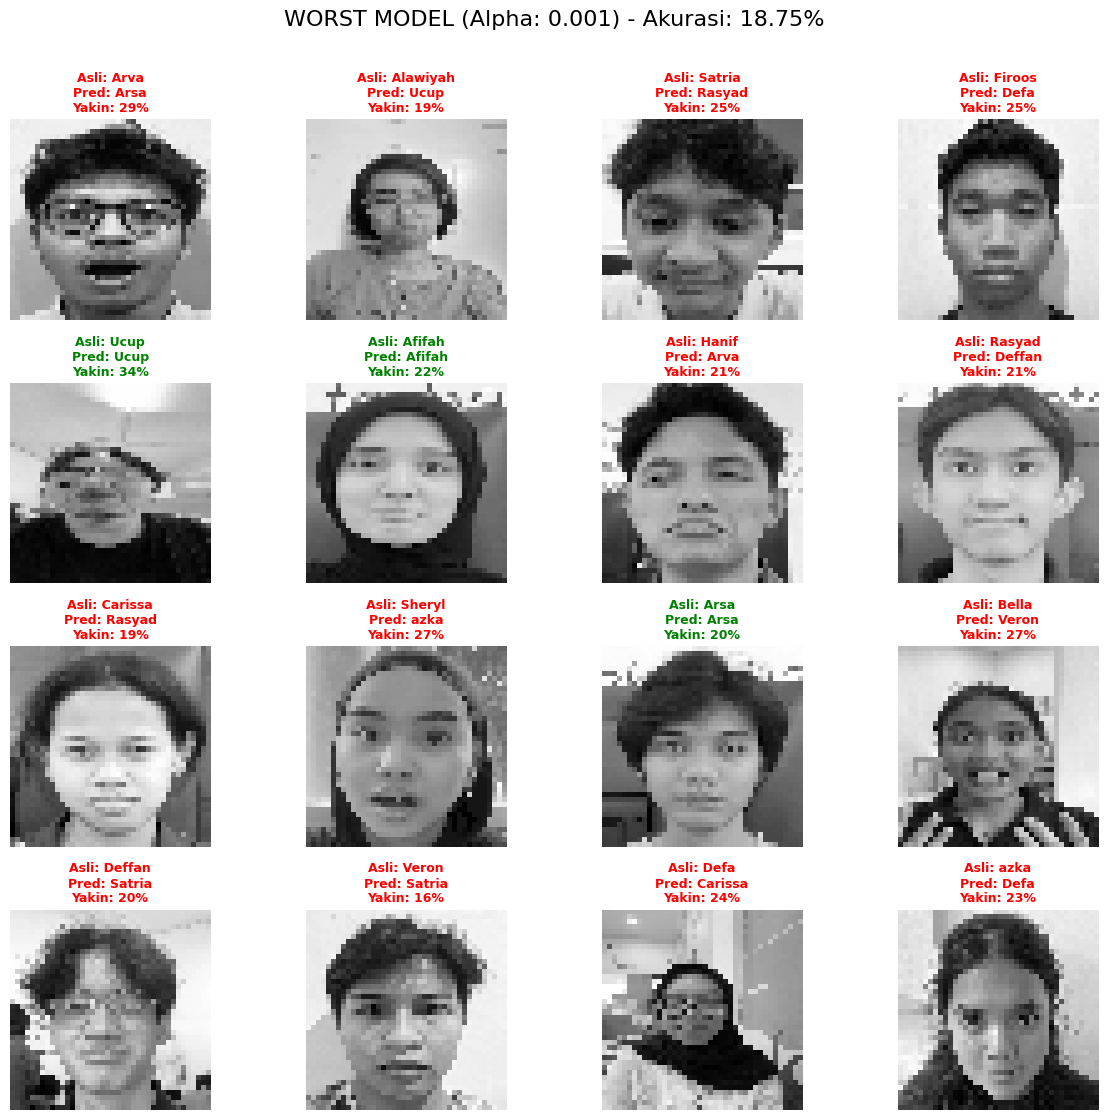


Menampilkan Visualisasi Best Model...


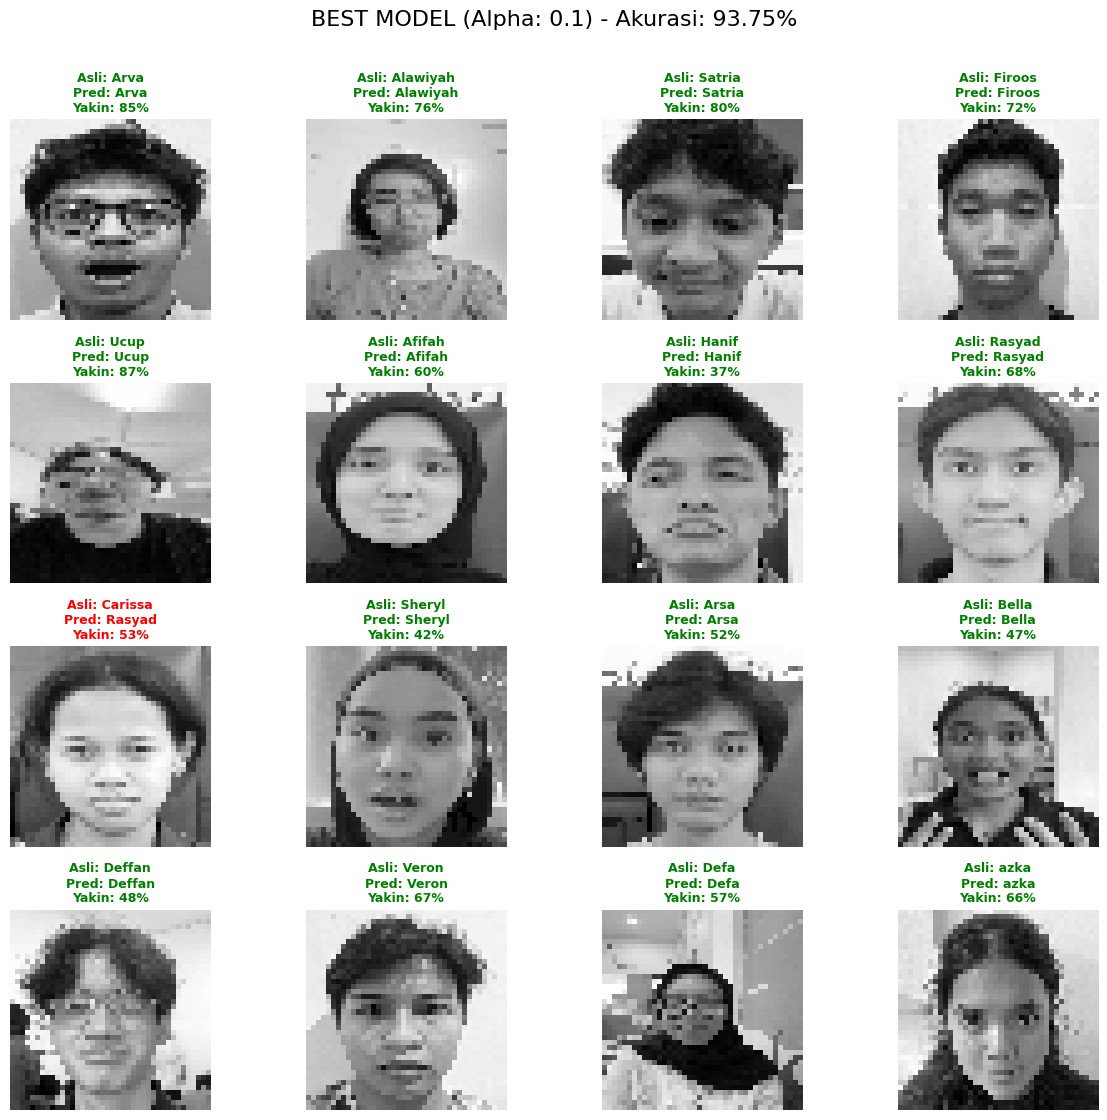

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. LATIH ULANG UNTUK MENDAPATKAN MODEL LENGKAP ---
# Kita simpan bobot (V, W, v0, w0) untuk setiap Alpha
models_archive = []

alphas_to_test = [0.001, 0.1, 0.9] # 0.001 (Sangat Lambat), 0.1 (Pas), 0.9 (Tidak Stabil)
print("Sedang melatih ulang untuk perbandingan...")

for lr in alphas_to_test:
    # Reset Bobot Awal (Supaya adil, start dari titik sama)
    np.random.seed(42)
    input_size = 1600; hidden_size = 64; output_size = len(label_map)

    V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
    v0 = np.random.uniform(-0.5, 0.5, hidden_size)
    W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
    w0 = np.random.uniform(-0.5, 0.5, output_size)

    # Training Singkat (40 epoch)
    for epoch in range(40):
        for i in range(len(X_train)):
            x_in = X_train[i]
            t = np.zeros(output_size); t[y_train[i]] = 1

            z = 1 / (1 + np.exp(-(v0 + np.dot(V, x_in))))
            y_pred = 1 / (1 + np.exp(-(w0 + np.dot(W, z))))

            error = t - y_pred

            delta_k = error * (y_pred * (1 - y_pred))
            delta_j = np.dot(delta_k, W) * (z * (1 - z))

            W += lr * np.outer(delta_k, z)
            w0 += lr * delta_k
            V += lr * np.outer(delta_j, x_in)
            v0 += lr * delta_j

    # Hitung Akurasi Akhir di Data Test
    correct = 0
    for i in range(len(X_test)):
        z = 1 / (1 + np.exp(-(v0 + np.dot(V, X_test[i]))))
        y_p = 1 / (1 + np.exp(-(w0 + np.dot(W, z))))
        if np.argmax(y_p) == y_test[i]: correct += 1
    acc = (correct/len(X_test))*100

    # Simpan Model
    models_archive.append({
        'alpha': lr,
        'accuracy': acc,
        'V': V, 'W': W, 'v0': v0, 'w0': w0
    })
    print(f"-> Alpha {lr}: Akurasi {acc:.2f}%")

# --- 2. CARI MODEL TERBAIK & TERBURUK ---
# Urutkan berdasarkan akurasi
models_archive.sort(key=lambda x: x['accuracy'])

worst_model = models_archive[0]  # Akurasi paling rendah
best_model = models_archive[-1]  # Akurasi paling tinggi

print("-" * 50)
print(f"WORST MODEL : Alpha {worst_model['alpha']} (Akurasi {worst_model['accuracy']:.2f}%)")
print(f"BEST MODEL  : Alpha {best_model['alpha']} (Akurasi {best_model['accuracy']:.2f}%)")
print("-" * 50)


# --- 3. FUNGSI VISUALISASI GRID ---
def visualize_model_predictions(model_data, title_prefix, figure_num):
    V, W, v0, w0 = model_data['V'], model_data['W'], model_data['v0'], model_data['w0']
    lr = model_data['alpha']

    plt.figure(figsize=(12, 12))
    plt.suptitle(f"{title_prefix} (Alpha: {lr}) - Akurasi: {model_data['accuracy']:.2f}%", fontsize=16, y=0.96)

    # Ambil 16 sampel
    for i in range(16):
        # Prediksi
        z = 1 / (1 + np.exp(-(v0 + np.dot(V, X_test[i]))))
        y_final = 1 / (1 + np.exp(-(w0 + np.dot(W, z))))

        pred_idx = np.argmax(y_final)
        true_idx = y_test[i]
        confidence = np.max(y_final) * 100 # Seberapa yakin dia?

        # Plot
        plt.subplot(4, 4, i+1)
        plt.imshow(X_test[i].reshape(40,40), cmap='gray')

        color = 'green' if pred_idx == true_idx else 'red'
        # Tampilkan Confidence juga biar kelihatan bedanya
        plt.title(f"Asli: {label_map[true_idx]}\nPred: {label_map[pred_idx]}\nYakin: {confidence:.0f}%",
                  color=color, fontsize=9, fontweight='bold')
        plt.axis('off')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- 4. TAMPILKAN KEDUANYA ---
print("Menampilkan Visualisasi Worst Model...")
visualize_model_predictions(worst_model, "WORST MODEL", 1)

print("\nMenampilkan Visualisasi Best Model...")
visualize_model_predictions(best_model, "BEST MODEL", 2)

# **CNN Method**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
import tensorflow as tf

# --- FUNGSI LOAD DATASET ---
def load_dataset_cnn(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah.")
        return None, None, None

    for subdir in sorted(os.listdir(base_path)):
        path = os.path.join(base_path, subdir)
        if os.path.isdir(path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40))
                    data.append(img)
                    labels.append(current_label)
            current_label += 1
    return np.array(data), np.array(labels), label_map

# Load Data
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/"
X_raw, y, label_map = load_dataset_cnn(dataset_path)

# --- Handle case where data loading failed ---
if X_raw is None:
    print(f"\nERROR: No data loaded. Please check if the dataset path '{dataset_path}' is correct and accessible, and contains images.")
else:
    # --- RESHAPE UNTUK CNN ---
    # Bentuk awal: (Jumlah, 40, 40)
    # Bentuk target: (Jumlah, 40, 40, 1) -> Angka 1 artinya grayscale (1 channel)
    X_cnn = X_raw.reshape(-1, 40, 40, 1)
    X_cnn = X_cnn.astype('float32') / 255.0

    # Split
    X_train, X_test, y_train, y_test = train_test_split(X_cnn, y, test_size=0.2, stratify=y, random_state=42)

    print(f"Data Siap untuk CNN.")
    print(f"Shape Training: {X_train.shape}")
    print(f"Shape Testing : {X_test.shape}")


Data Siap untuk CNN.
Shape Training: (64, 40, 40, 1)
Shape Testing : (16, 40, 40, 1)


In [ ]:
# --- DEFINISI MODEL CNN ---
class SimpleCNN(tf.keras.Model):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        # Layer 1: Konvolusi & Pooling
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(40, 40, 1))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))

        # Layer 2: Konvolusi & Pooling
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))

        # Layer 3: Flatten & Dense (Klasifikasi)
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(64, activation='relu')
        self.dense2 = tf.keras.layers.Dense(num_classes, activation='softmax') # Output

    def call(self, x):
        x = self.conv1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        return self.dense2(x)

# Inisialisasi Model
num_classes = len(label_map)
model = SimpleCNN(num_classes)

# Definisi Optimizer dan Loss Function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# --- MANUAL TRAINING LOOP (PENGGANTI model.fit) ---
epochs = 30
batch_size = 16

# Ubah data ke format tf.data supaya mudah dibatch
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(1000).batch(batch_size)

print(f">>> MULAI TRAINING CNN MANUAL ({epochs} Epochs) <<<")
print("Lihat Loss turun dan Akurasi naik:")
print("-" * 60)

history_acc = []

for epoch in range(epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Loop per Batch (Mirip loop per data di BPNN)
    for x_batch, y_batch in train_dataset:

        # 1. Buka "Tape" untuk merekam operasi (Forward Pass)
        with tf.GradientTape() as tape:
            # Prediksi
            logits = model(x_batch, training=True)
            # Hitung Error
            loss_value = loss_fn(y_batch, logits)

        # 2. Hitung Gradient (Backward Pass) otomatis
        # (TensorFlow menghitung turunan parsial untuk semua bobot filter)
        grads = tape.gradient(loss_value, model.trainable_variables)

        # 3. Update Bobot (Optimizer step)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))

        # Catat statistik
        epoch_loss_avg.update_state(loss_value)
        epoch_accuracy.update_state(y_batch, logits)

    # Print Log per Epoch
    curr_loss = epoch_loss_avg.result()
    curr_acc = epoch_accuracy.result() * 100
    history_acc.append(curr_acc)

    print(f"Epoch {epoch+1:02d}/{epochs} | Loss: {curr_loss:.4f} | Akurasi: {curr_acc:.2f}%")

print("-" * 60)
print("Training CNN Selesai.")

>>> MULAI TRAINING CNN MANUAL (30 Epochs) <<<
Lihat Loss turun dan Akurasi naik:
------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 01/30 | Loss: 2.8016 | Akurasi: 1.56%
Epoch 02/30 | Loss: 2.7389 | Akurasi: 25.00%
Epoch 03/30 | Loss: 2.6945 | Akurasi: 39.06%
Epoch 04/30 | Loss: 2.6293 | Akurasi: 40.62%
Epoch 05/30 | Loss: 2.5097 | Akurasi: 28.12%
Epoch 06/30 | Loss: 2.3768 | Akurasi: 34.38%
Epoch 07/30 | Loss: 2.1714 | Akurasi: 43.75%
Epoch 08/30 | Loss: 1.9207 | Akurasi: 54.69%
Epoch 09/30 | Loss: 1.6577 | Akurasi: 54.69%
Epoch 10/30 | Loss: 1.3952 | Akurasi: 68.75%
Epoch 11/30 | Loss: 1.1017 | Akurasi: 78.12%
Epoch 12/30 | Loss: 0.8695 | Akurasi: 92.19%
Epoch 13/30 | Loss: 0.5998 | Akurasi: 90.62%
Epoch 14/30 | Loss: 0.3933 | Akurasi: 100.00%
Epoch 15/30 | Loss: 0.2676 | Akurasi: 100.00%
Epoch 16/30 | Loss: 0.1404 | Akurasi: 100.00%
Epoch 17/30 | Loss: 0.1005 | Akurasi: 100.00%
Epoch 18/30 | Loss: 0.0726 | Akurasi: 100.00%
Epoch 19/30 | Loss: 0.0479 | Akurasi: 100.00%
Epoch 20/30 | Loss: 0.0292 | Akurasi: 100.00%
Epoch 21/30 | Loss: 0.0252 | Akurasi: 100.00%
Epoch 22/30 | Loss: 0.0167 | Akurasi: 100.00%
Ep

>>> MELAKUKAN EVALUASI PADA DATA TEST <<<

>>> HASIL AKHIR CNN <<<
Akurasi Testing: 100.00%


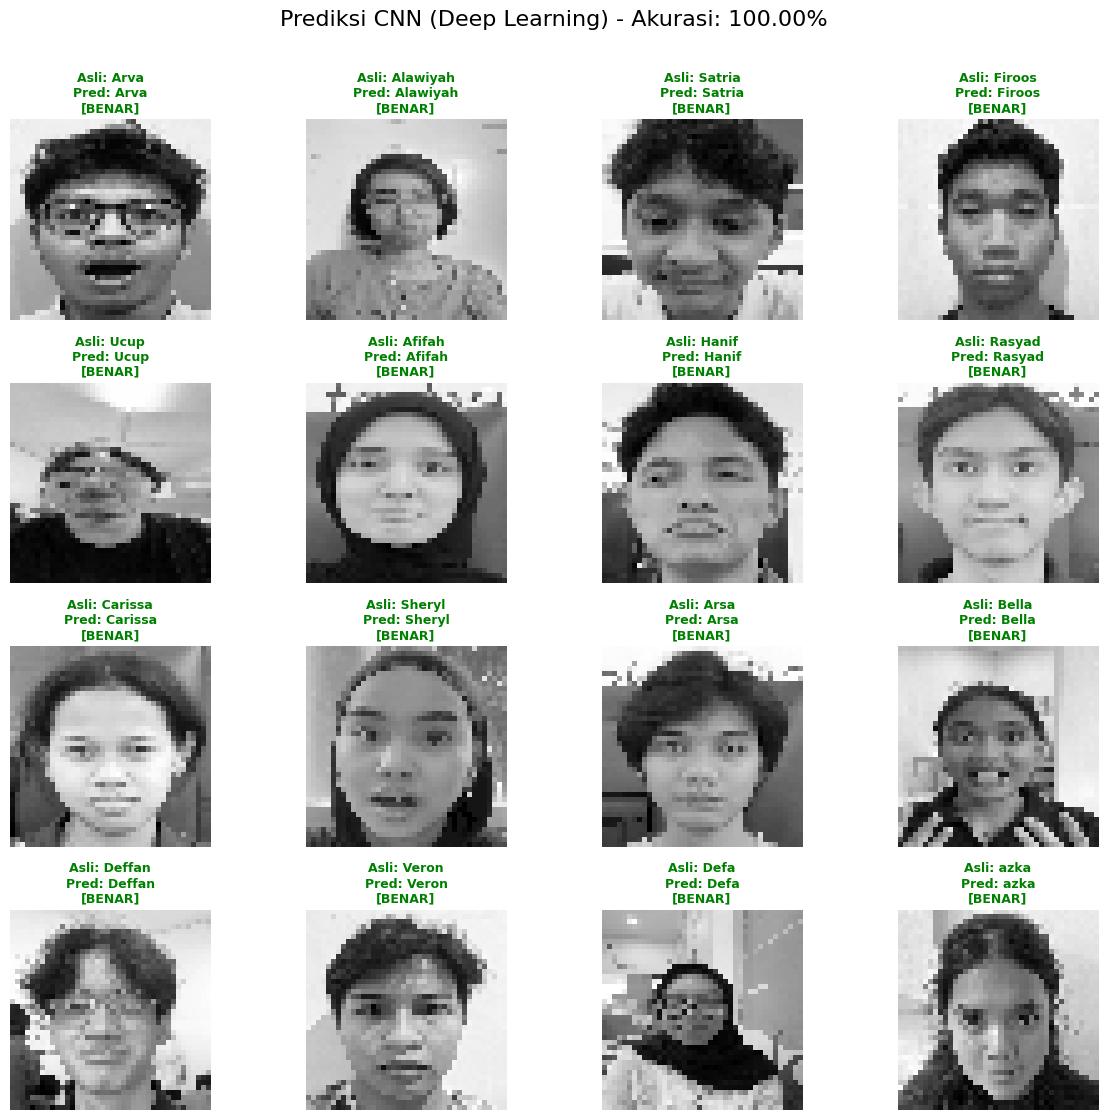

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# --- JANGAN DEFINISI ULANG MODEL DI SINI ---
# Kita gunakan 'model' yang sudah dilatih (pintar) dari cell sebelumnya.

print(">>> MELAKUKAN EVALUASI PADA DATA TEST <<<")

# Pastikan X_test bertipe float32 agar sesuai dengan training
X_test = tf.cast(X_test, tf.float32)

# --- EVALUASI PADA DATA TEST ---
# Lakukan Forward Pass pada seluruh data test menggunakan model yang SUDAH DILATIH
# training=False penting agar Dropout (jika ada) tidak aktif saat ujian
predictions = model(X_test, training=False)
pred_labels = tf.argmax(predictions, axis=1).numpy() # Ambil index probabilitas tertinggi

# Hitung Akurasi Manual
correct = np.sum(pred_labels == y_test)
acc_cnn = (correct / len(y_test)) * 100

print(f"\n>>> HASIL AKHIR CNN <<<")
print(f"Akurasi Testing: {acc_cnn:.2f}%")

# --- VISUALISASI 16 SAMPEL ---
num_samples = 16
# Pastikan tidak error index out of bounds jika data test < 16
num_samples = min(num_samples, len(X_test))
indices = np.arange(num_samples)

plt.figure(figsize=(12, 12))
plt.suptitle(f"Prediksi CNN (Deep Learning) - Akurasi: {acc_cnn:.2f}%", fontsize=16, y=0.96)

for i in range(num_samples):
    idx = indices[i]
    img = X_test[idx] # Ambil data gambar

    # Prediksi
    pred_lbl = pred_labels[idx]
    true_lbl = y_test[idx]

    # Plotting
    plt.subplot(4, 4, i+1)

    # Reshape balik ke 2D (40x40) untuk ditampilkan gambar aslinya
    # Kita pakai .numpy() jika img masih dalam bentuk Tensor
    if tf.is_tensor(img):
        img_display = img.numpy().reshape(40, 40)
    else:
        img_display = img.reshape(40, 40)

    plt.imshow(img_display, cmap='gray')

    color = 'green' if pred_lbl == true_lbl else 'red'
    status = "BENAR" if pred_lbl == true_lbl else "SALAH"

    # Pastikan label_map ada. Jika error, cek apakah cell load data sudah dijalankan
    try:
        label_text = f"Asli: {label_map[true_lbl]}\nPred: {label_map[pred_lbl]}\n[{status}]"
    except:
        label_text = f"Asli: {true_lbl}\nPred: {pred_lbl}\n[{status}]"

    plt.title(label_text, color=color, fontsize=9, fontweight='bold')
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# **Perbandingan CNN dan BPNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2
import tensorflow as tf

# --- FUNGSI LOAD DATASET ---
def load_dataset_dual(base_path):
    data = []
    labels = []
    label_map = {}
    current_label = 0

    if not os.path.exists(base_path):
        print("Path dataset salah.")
        return None, None, None

    for subdir in sorted(os.listdir(base_path)):
        path = os.path.join(base_path, subdir)
        if os.path.isdir(path):
            label_map[current_label] = subdir
            for file in sorted(os.listdir(path)):
                if file.endswith(('.jpg', '.png', '.jpeg')):
                    img = cv2.imread(os.path.join(path, file), cv2.IMREAD_GRAYSCALE)
                    img = cv2.resize(img, (40, 40))
                    data.append(img) # Simpan mentah dulu (40x40)
                    labels.append(current_label)
            current_label += 1
    return np.array(data), np.array(labels), label_map

# Load Data
dataset_path = "/content/drive/My Drive/FINPRO_PEMOD/"
X_raw, y, label_map = load_dataset_dual(dataset_path)

# --- SPLIT DATA DULU (BIAR ADIL) ---
# Kita split index-nya saja, biar nanti data vector dan image orangnya sama
indices = np.arange(len(X_raw))
X_train_idx, X_test_idx, y_train, y_test = train_test_split(indices, y, test_size=0.2, stratify=y, random_state=42)

# --- FORMAT 1: UNTUK BPNN (VECTOR) ---
# Ambil data berdasarkan index, lalu flatten
X_train_vec = X_raw[X_train_idx].reshape(len(X_train_idx), -1) / 255.0
X_test_vec  = X_raw[X_test_idx].reshape(len(X_test_idx), -1) / 255.0

# --- FORMAT 2: UNTUK CNN (IMAGE 4D) ---
# Ambil data, reshape ke (N, 40, 40, 1)
X_train_cnn = X_raw[X_train_idx].reshape(-1, 40, 40, 1) / 255.0
X_test_cnn  = X_raw[X_test_idx].reshape(-1, 40, 40, 1) / 255.0

# One-hot encoding untuk CNN Target
y_train_cnn = tf.keras.utils.to_categorical(y_train, len(label_map))
y_test_cnn = tf.keras.utils.to_categorical(y_test, len(label_map))

print("=== DATA SIAP ===")
print(f"1. BPNN Input Shape : {X_train_vec.shape} (Vector)")
print(f"2. CNN Input Shape  : {X_train_cnn.shape} (Image 4D)")

=== DATA SIAP ===
1. BPNN Input Shape : (64, 1600) (Vector)
2. CNN Input Shape  : (64, 40, 40, 1) (Image 4D)


In [ ]:
# --- MODEL 1: BPNN MANUAL ---
print("\n>>> TRAINING MODEL 1: BPNN (Vector Based) <<<")

# Parameter
input_size = 1600
hidden_size = 64
output_size = len(label_map)
learning_rate = 0.1 # Alpha optimal
epochs = 30

# Inisialisasi
np.random.seed(42)
V = np.random.uniform(-0.5, 0.5, (hidden_size, input_size))
v0 = np.random.uniform(-0.5, 0.5, hidden_size)
W = np.random.uniform(-0.5, 0.5, (output_size, hidden_size))
w0 = np.random.uniform(-0.5, 0.5, output_size)

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

bpnn_history = []

for epoch in range(epochs):
    correct = 0
    for i in range(len(X_train_vec)):
        # Forward
        x_in = X_train_vec[i]
        t = np.zeros(output_size); t[y_train[i]] = 1

        z = sigmoid(v0 + np.dot(V, x_in))
        y_pred = sigmoid(w0 + np.dot(W, z))

        if np.argmax(y_pred) == y_train[i]: correct += 1

        # Backward
        error = t - y_pred
        delta_k = error * sigmoid_deriv(y_pred)
        delta_j = np.dot(delta_k, W) * sigmoid_deriv(z)

        W += learning_rate * np.outer(delta_k, z)
        w0 += learning_rate * delta_k
        V += learning_rate * np.outer(delta_j, x_in)
        v0 += learning_rate * delta_j

    acc = (correct / len(X_train_vec)) * 100
    bpnn_history.append(acc)
    print(f"BPNN Epoch {epoch+1}/{epochs} | Akurasi: {acc:.2f}%")

print("BPNN Selesai.")


>>> TRAINING MODEL 1: BPNN (Vector Based) <<<
BPNN Epoch 1/30 | Akurasi: 12.50%
BPNN Epoch 2/30 | Akurasi: 25.00%
BPNN Epoch 3/30 | Akurasi: 28.12%
BPNN Epoch 4/30 | Akurasi: 40.62%
BPNN Epoch 5/30 | Akurasi: 46.88%
BPNN Epoch 6/30 | Akurasi: 50.00%
BPNN Epoch 7/30 | Akurasi: 53.12%
BPNN Epoch 8/30 | Akurasi: 54.69%
BPNN Epoch 9/30 | Akurasi: 56.25%
BPNN Epoch 10/30 | Akurasi: 64.06%
BPNN Epoch 11/30 | Akurasi: 68.75%
BPNN Epoch 12/30 | Akurasi: 70.31%
BPNN Epoch 13/30 | Akurasi: 70.31%
BPNN Epoch 14/30 | Akurasi: 71.88%
BPNN Epoch 15/30 | Akurasi: 78.12%
BPNN Epoch 16/30 | Akurasi: 79.69%
BPNN Epoch 17/30 | Akurasi: 79.69%
BPNN Epoch 18/30 | Akurasi: 79.69%
BPNN Epoch 19/30 | Akurasi: 79.69%
BPNN Epoch 20/30 | Akurasi: 79.69%
BPNN Epoch 21/30 | Akurasi: 82.81%
BPNN Epoch 22/30 | Akurasi: 82.81%
BPNN Epoch 23/30 | Akurasi: 82.81%
BPNN Epoch 24/30 | Akurasi: 85.94%
BPNN Epoch 25/30 | Akurasi: 87.50%
BPNN Epoch 26/30 | Akurasi: 90.62%
BPNN Epoch 27/30 | Akurasi: 90.62%
BPNN Epoch 28/30 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# --- MODEL 2: CNN (Image Based) ---
print("\n>>> TRAINING MODEL 2: CNN (Deep Learning) <<<")

model_cnn = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(40,40,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(output_size, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train (Simpan history untuk plot)
# Kita set epochs sama dengan BPNN (30) biar adil
history_cnn_raw = model_cnn.fit(X_train_cnn, y_train_cnn, epochs=30, batch_size=16, verbose=1)

# Ambil data akurasi
cnn_history = [x * 100 for x in history_cnn_raw.history['accuracy']]

print("CNN Selesai.")


>>> TRAINING MODEL 2: CNN (Deep Learning) <<<
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.0458 - loss: 2.8044
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0750 - loss: 2.7403
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.2229 - loss: 2.6966
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3208 - loss: 2.6061
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.4167 - loss: 2.4880
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5458 - loss: 2.2575
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7521 - loss: 1.9550
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.6562 - loss: 1.6885
Epoch 9/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8813 - loss: 1.3174
Epoch 10/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7542 - loss: 1.0884
Epoch 11/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.9042 - loss: 0.7183
Epoch 12/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9417 - loss: 0.5057
Epoch 13/30


Sedang mencari sampel di mana BPNN gagal tapi CNN berhasil...


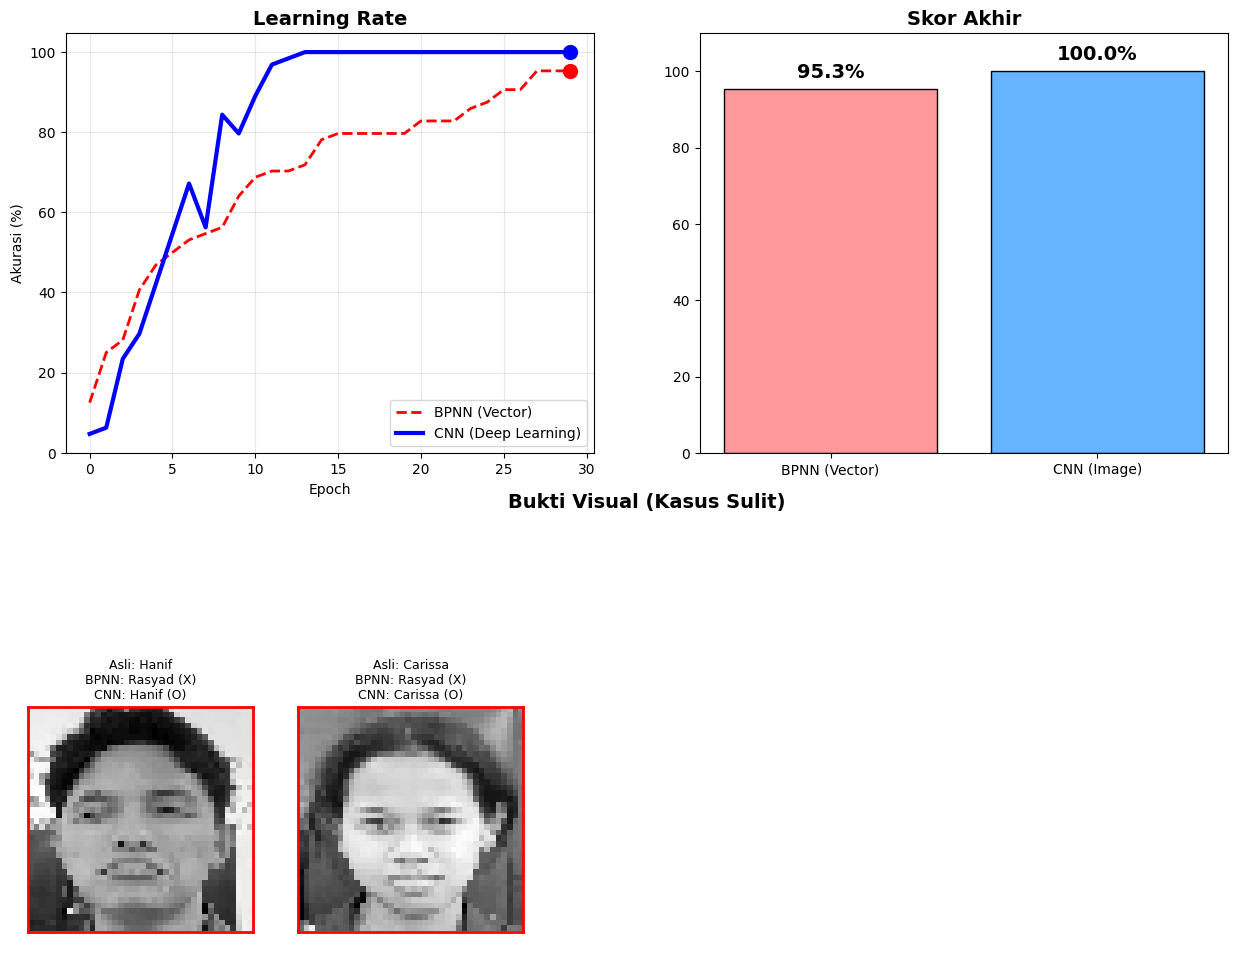

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# --- 1. PERSIAPAN DATA VISUALISASI ---
# (Asumsi variables bpnn_history, cnn_history, dan model-model sudah ada dari blok sebelumnya)
# Jika belum, pastikan blok training "Bagian 2" dan "Bagian 3" di atas sudah dijalankan.

# Cari Sampel "Hard Cases": Di mana BPNN Salah, tapi CNN Benar
found_indices = []
print("Sedang mencari sampel di mana BPNN gagal tapi CNN berhasil...")

# Fungsi Prediksi BPNN Manual
def predict_bpnn(idx):
    x_in = X_test_vec[idx]
    z = 1 / (1 + np.exp(-(v0 + np.dot(V, x_in))))
    y_p = 1 / (1 + np.exp(-(w0 + np.dot(W, z))))
    return np.argmax(y_p)

# Fungsi Prediksi CNN (Batch)
cnn_preds_all = model_cnn.predict(X_test_cnn, verbose=0)
cnn_preds_idx = np.argmax(cnn_preds_all, axis=1)

# Loop cari perbedaan
for i in range(len(y_test)):
    pred_bpnn = predict_bpnn(i)
    pred_cnn = cnn_preds_idx[i]
    true_label = y_test[i]

    # Kriteria: BPNN Salah DAN CNN Benar
    if pred_bpnn != true_label and pred_cnn == true_label:
        found_indices.append(i)
        if len(found_indices) >= 5: # Cukup ambil 5 bukti saja
            break

# --- 2. MULAI PLOTTING ---
plt.figure(figsize=(15, 12))

# --- GRAFIK A: LEARNING CURVE (BALAPAN) ---
plt.subplot(2, 2, 1)
plt.plot(bpnn_history, color='red', linestyle='--', linewidth=2, label='BPNN (Vector)')
plt.plot(cnn_history, color='blue', linewidth=3, label='CNN (Deep Learning)')
plt.title("Learning Rate", fontsize=14, fontweight='bold')
plt.xlabel("Epoch")
plt.ylabel("Akurasi (%)")
plt.legend()
plt.grid(True, alpha=0.3)
# Highlight hasil akhir
plt.scatter(len(bpnn_history)-1, bpnn_history[-1], color='red', s=100, zorder=5)
plt.scatter(len(cnn_history)-1, cnn_history[-1], color='blue', s=100, zorder=5)

# --- GRAFIK B: FINAL SCORE (BAR CHART) ---
plt.subplot(2, 2, 2)
labels = ['BPNN (Vector)', 'CNN (Image)']
scores = [bpnn_history[-1], cnn_history[-1]]
colors = ['#ff9999', '#66b3ff']

bars = plt.bar(labels, scores, color=colors, edgecolor='black')
plt.title("Skor Akhir", fontsize=14, fontweight='bold')
plt.ylim(0, 110)

# Taruh angka di atas batang
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height + 2, f'{height:.1f}%', ha='center', va='bottom', fontsize=14, fontweight='bold')

# --- GRAFIK C: VISUAL PROOF (THE KNOCKOUT) ---
# Menampilkan wajah yg gagal dikenali BPNN tapi sukses dikenali CNN
plt.subplot(2, 1, 2) # Gabung baris bawah
plt.axis('off')
plt.title("Bukti Visual (Kasus Sulit)", fontsize=14, fontweight='bold', y=1.05)

# Buat sub-grid manual di dalam area bawah
if len(found_indices) > 0:
    for i, idx in enumerate(found_indices):
        # Setup posisi gambar kecil
        ax = plt.axes([0.1 + (i * 0.18), 0.1, 0.15, 0.25]) # [left, bottom, width, height]

        # Tampilkan wajah
        ax.imshow(X_raw[X_test_idx[idx]].reshape(40,40), cmap='gray')

        # Tulis Hasil
        true_lbl = label_map[y_test[idx]]
        bpnn_lbl = label_map[predict_bpnn(idx)]
        cnn_lbl = label_map[cnn_preds_idx[idx]]

        ax.set_title(f"Asli: {true_lbl}\nBPNN: {bpnn_lbl} (X)\nCNN: {cnn_lbl} (O)", fontsize=9)

        # Beri border merah karena ini kasus sulit
        for spine in ax.spines.values():
            spine.set_edgecolor('red')
            spine.set_linewidth(2)
        ax.set_xticks([])
        ax.set_yticks([])
else:
    plt.text(0.5, 0.5, "Hebat! Kedua model sama-sama benar semua (atau BPNN hoki).", ha='center', fontsize=12)

plt.show()